# **Time Series Analysis on Asset Management Industry**

## Introduction
**Overview of the Asset Management Industry :**

The asset management industry plays a crucial role in global financial markets by managing investments on behalf of individuals and institutions. Companies like ICICI Prudential AMC, HDFC AMC, and Nippon Life India Asset Management Ltd. are key players, offering mutual funds, portfolio management services, and investment advisory. Effective asset management relies on understanding market trends, forecasting price movements, and mitigating risks.

**Importance of Time Series Analysis in Asset Management :**

Time series analysis is a powerful statistical tool used to model and predict financial data over time. In asset management, forecasting stock prices and market trends helps in making informed investment decisions. By analyzing past performance and market behavior, asset managers can enhance portfolio returns while managing risk exposure.

**Objective of the Project :**

This project focuses on time series forecasting of stock prices in the asset management industry using ARIMA models. The objective is to analyze historical stock price trends of ICICI, HDFC AMC, and Nippon Life India Asset Management Ltd. and develop forecasting models that can provide insights into future price movements. By leveraging ARIMA (AutoRegressive Integrated Moving Average), the study aims to identify patterns, detect seasonality, and improve investment decision-making strategies.

## Data Collection & Preprocessing

In [1]:
import pandas as pd

# Importing the yfinance package
import yfinance as yf

# Fetching data for Black Rock, HDFC AMC, Nippon Life for the last 5 years
icici = yf.download('ICICIPRULI.NS', period='5y')
hdfc = yf.download('HDFCAMC.NS', period='5y')
nippon = yf.download('NAM-INDIA.NS', period='5y')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# Preview the first few rows of the dataset
icici.head()

Price              Close          High           Low          Open  \
Ticker     ICICIPRULI.NS ICICIPRULI.NS ICICIPRULI.NS ICICIPRULI.NS   
Date                                                                 
2020-02-18    468.793182    470.829890    462.981075    467.054520   
2020-02-19    486.378510    487.769464    467.501598    470.283477   
2020-02-20    491.793213    500.734908    487.620410    487.620410   
2020-02-24    483.298615    497.754342    480.367714    485.832083   
2020-02-25    477.933563    486.726236    471.922770    483.994051   

Price             Volume  
Ticker     ICICIPRULI.NS  
Date                      
2020-02-18        859469  
2020-02-19       1184541  
2020-02-20       1385523  
2020-02-24        947108  
2020-02-25       1146861

In [3]:
hdfc.head()

Price             Close         High          Low         Open     Volume
Ticker       HDFCAMC.NS   HDFCAMC.NS   HDFCAMC.NS   HDFCAMC.NS HDFCAMC.NS
Date                                                                     
2020-02-18  2952.834961  2976.077057  2917.399013  2975.160213     198514
2020-02-19  3079.038330  3094.349585  2966.908225  2966.908225     503635
2020-02-20  3102.418213  3159.996088  3066.844604  3091.599404     493099
2020-02-24  3005.645264  3108.056742  2990.838316  3080.597296     275139
2020-02-25  2993.038574  3066.844549  2981.853117  3023.752862     221332

In [4]:
nippon.head()

Price             Close         High          Low         Open       Volume
Ticker     NAM-INDIA.NS NAM-INDIA.NS NAM-INDIA.NS NAM-INDIA.NS NAM-INDIA.NS
Date                                                                       
2020-02-18   337.048859   339.499633   320.151249   323.934954      2005888
2020-02-19   369.167145   373.853764   339.843616   339.886602      6982668
2020-02-20   379.787262   389.461454   369.769104   373.036821      4149436
2020-02-24   366.372437   379.056379   363.405700   373.595855      2107594
2020-02-25   362.416718   376.906485   357.601115   368.737168      1848965

In [5]:
# Check for missing values
print(icici.isnull().sum())
print(hdfc.isnull().sum())
print(nippon.isnull().sum())

Price   Ticker       
Close   ICICIPRULI.NS    0
High    ICICIPRULI.NS    0
Low     ICICIPRULI.NS    0
Open    ICICIPRULI.NS    0
Volume  ICICIPRULI.NS    0
dtype: int64
Price   Ticker    
Close   HDFCAMC.NS    0
High    HDFCAMC.NS    0
Low     HDFCAMC.NS    0
Open    HDFCAMC.NS    0
Volume  HDFCAMC.NS    0
dtype: int64
Price   Ticker      
Close   NAM-INDIA.NS    0
High    NAM-INDIA.NS    0
Low     NAM-INDIA.NS    0
Open    NAM-INDIA.NS    0
Volume  NAM-INDIA.NS    0
dtype: int64


**Computing daily returns**

In [6]:
icici['Daily Return'] = icici['Close'].pct_change()
hdfc['Daily Return'] = hdfc['Close'].pct_change()
nippon['Daily Return'] = nippon['Close'].pct_change()

In [7]:
print(icici[['Close', 'Daily Return']].head())
print(hdfc[['Close', 'Daily Return']].head())
print(nippon[['Close', 'Daily Return']].head())

Price              Close Daily Return
Ticker     ICICIPRULI.NS             
Date                                 
2020-02-18    468.793182          NaN
2020-02-19    486.378510     0.037512
2020-02-20    491.793213     0.011133
2020-02-24    483.298615    -0.017273
2020-02-25    477.933563    -0.011101
Price             Close Daily Return
Ticker       HDFCAMC.NS             
Date                                
2020-02-18  2952.834961          NaN
2020-02-19  3079.038330     0.042740
2020-02-20  3102.418213     0.007593
2020-02-24  3005.645264    -0.031193
2020-02-25  2993.038574    -0.004194
Price             Close Daily Return
Ticker     NAM-INDIA.NS             
Date                                
2020-02-18   337.048859          NaN
2020-02-19   369.167145     0.095293
2020-02-20   379.787262     0.028768
2020-02-24   366.372437    -0.035322
2020-02-25   362.416718    -0.010797


In [8]:
# Resample to get the last 'Close' price of each month, as we have date time index
icici_monthly = icici['Close'].resample('ME').last()
hdfc_monthly = hdfc['Close'].resample('ME').last()
nippon_monthly = nippon['Close'].resample('ME').last()

In [9]:
print(icici_monthly.head())
print(hdfc_monthly.head())
print(nippon_monthly.head())

Ticker      ICICIPRULI.NS
Date                     
2020-02-29     468.346069
2020-03-31     353.395660
2020-04-30     409.281250
2020-05-31     390.553345
2020-06-30     423.041473
Ticker       HDFCAMC.NS
Date                   
2020-02-29  2880.174805
2020-03-31  1937.108887
2020-04-30  2320.303955
2020-05-31  2314.481934
2020-06-30  2276.845459
Ticker      NAM-INDIA.NS
Date                    
2020-02-29    335.801941
2020-03-31    214.294098
2020-04-30    212.187271
2020-05-31    219.453659
2020-06-30    272.057922


In [10]:
# Check for missing values
print(icici_monthly.isnull().sum())
print(hdfc_monthly.isnull().sum())
print(nippon_monthly.isnull().sum())

Ticker
ICICIPRULI.NS    0
dtype: int64
Ticker
HDFCAMC.NS    0
dtype: int64
Ticker
NAM-INDIA.NS    0
dtype: int64


**How to Handle Missing Data During Resampling :**

Sometimes resampling can introduce missing data, especially when resampling to lower frequencies (e.g., from daily to monthly). Pandas provides several ways to handle missing values after resampling:

**1. ffill() (Forward Fill): Fills missing values with the previous day's data.**

monthly_data = data['Close'].resample('ME').last().ffill()

     
**2. bfill() (Backward Fill): Fills missing values with the next valid value. Use the next day's data if FFILL is not suitable**

monthly_data = data['Close'].resample('M').last().bfill()

**3. Interpolate Missing Values – For a smooth time series:**

monthly_data = data['Close'].resample('M').mean().interpolate(method='linear')

In [11]:
# Summary statistics for the adjusted close prices
icici_summary = icici['Close'].describe()
hdfc_summary = hdfc['Close'].describe()
nippon_summary = nippon['Close'].describe()

In [12]:
print (icici_summary)
print (hdfc_summary)
print (nippon_summary)

Ticker  ICICIPRULI.NS
count     1239.000000
mean       534.620499
std         97.733487
min        237.252975
25%        458.758606
50%        525.975464
75%        590.746674
max        791.049988
Ticker   HDFCAMC.NS
count   1240.000000
mean    2681.846463
std      804.710855
min     1596.325439
25%     2065.447693
50%     2478.097046
75%     2993.872498
max     4827.899902
Ticker  NAM-INDIA.NS
count    1240.000000
mean      355.963453
std       151.145498
min       184.798538
25%       246.888435
50%       297.606659
75%       401.561569
max       805.900024


**Plotting histograms for daily returns to check distribution of data**

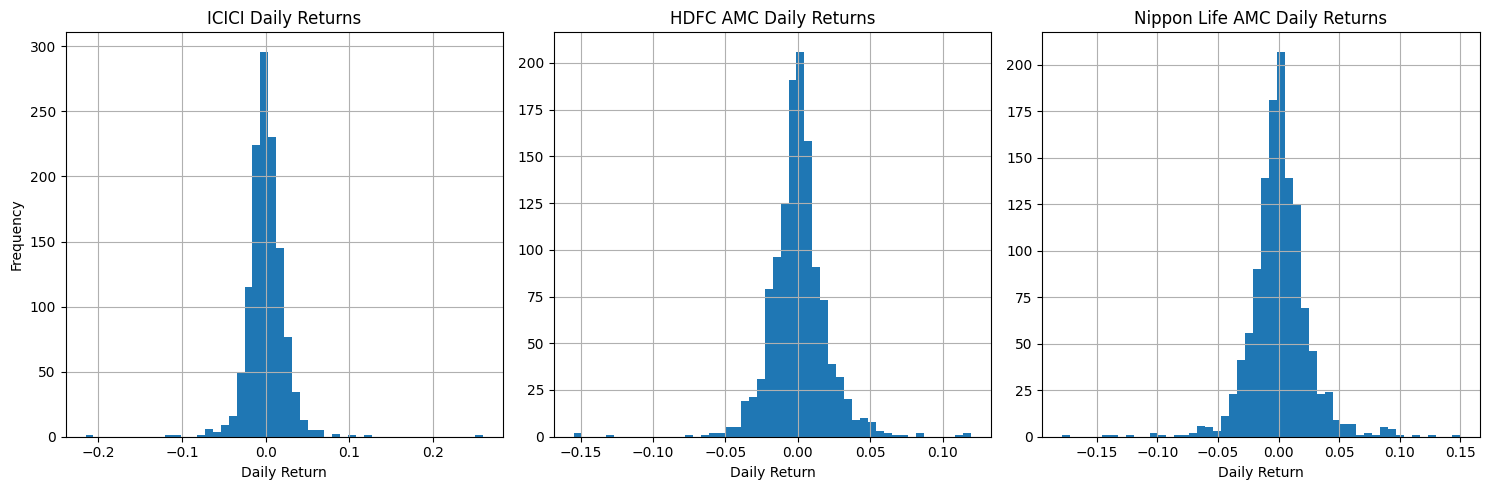

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
icici['Daily Return'].hist(bins=50)
plt.title('ICICI Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
# frequency is number of days

plt.subplot(1, 3, 2)
hdfc['Daily Return'].hist(bins=50)
plt.title('HDFC AMC Daily Returns')
plt.xlabel('Daily Return')

plt.subplot(1, 3, 3)
nippon['Daily Return'].hist(bins=50)
plt.title('Nippon Life AMC Daily Returns')
plt.xlabel('Daily Return')

plt.tight_layout()
plt.show()

**Plotting the Close Prices for all three stocks**

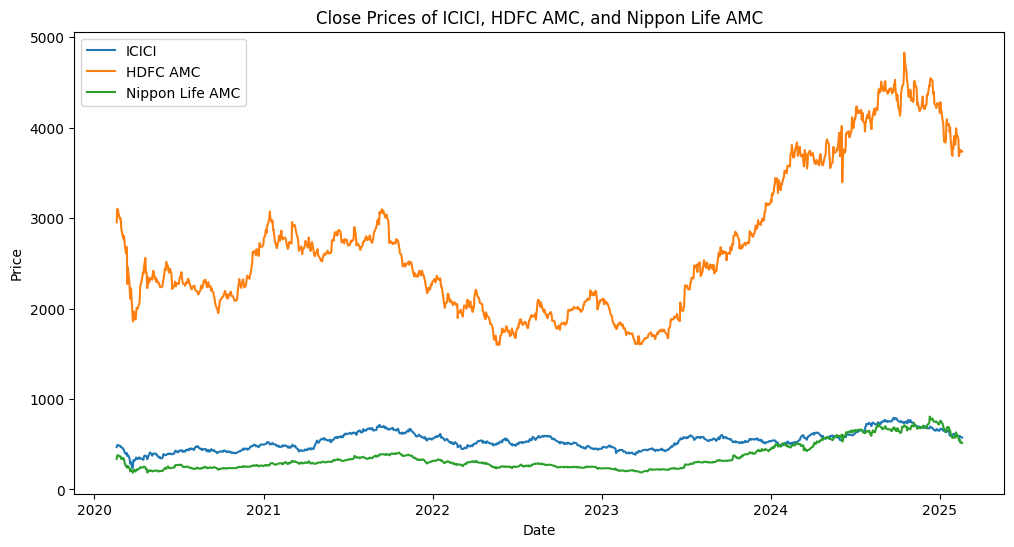

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(icici.index, icici['Close'], label="ICICI")
plt.plot(hdfc.index, hdfc['Close'], label="HDFC AMC")
plt.plot(nippon.index, nippon['Close'], label="Nippon Life AMC")

plt.title('Close Prices of ICICI, HDFC AMC, and Nippon Life AMC')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

**Rolling Mean (Moving Average)**

Significance:

The rolling mean calculates the average value of a time series over a specific window (e.g., 30 days) and "rolls" this window along the time series data. This smooths out short-term fluctuations and highlights longer-term trends.

In financial data, a rolling mean is often used to smooth out price data, helping to identify trends without being overly sensitive to daily volatility.

How to Interpret:

Trend Identification: If the rolling mean is moving upwards, it suggests an upward trend in the data (e.g., an increasing stock price).

If it’s moving downwards, it indicates a downward trend.

Momentum: Comparing the current price with the rolling mean can give insights into the momentum. If the price is consistently above the rolling mean, it indicates positive momentum (bullish). If it is consistently below, it suggests negative momentum (bearish).

**Rolling Standard Deviation**

Significance:

The rolling standard deviation measures how spread out the values in the data are over a specific window of time. In financial terms, this is often referred to as volatility.

High standard deviation indicates that the data points (e.g., stock prices or returns) are widely spread out, meaning the asset is more volatile. Low standard deviation suggests less volatility and that the prices are more stable.

How to Interpret:

Volatility: A higher rolling standard deviation indicates higher volatility over the window. It shows that the stock (or any financial instrument) has been experiencing larger price swings.

Risk: In finance, volatility is often equated with risk. If the rolling standard deviation is increasing, it may indicate that the asset is becoming riskier to hold. Conversely, a decreasing rolling standard deviation suggests that the asset is stabilizing.

Practical Interpretation in Financial Analysis:

Bullish vs. Bearish Trends:

If the price consistently stays above the rolling mean, this may indicate a strong bullish (upward) trend.

If the price consistently stays below the rolling mean, it indicates a bearish (downward) trend.

**Volatility Analysis:**

Investors might avoid highly volatile stocks (high rolling standard deviation) if they are risk-averse, as high volatility suggests the stock may experience unpredictable price swings. Conversely, risk-tolerant investors might be attracted to volatile stocks for potential high returns

<Axes: xlabel='Date'>

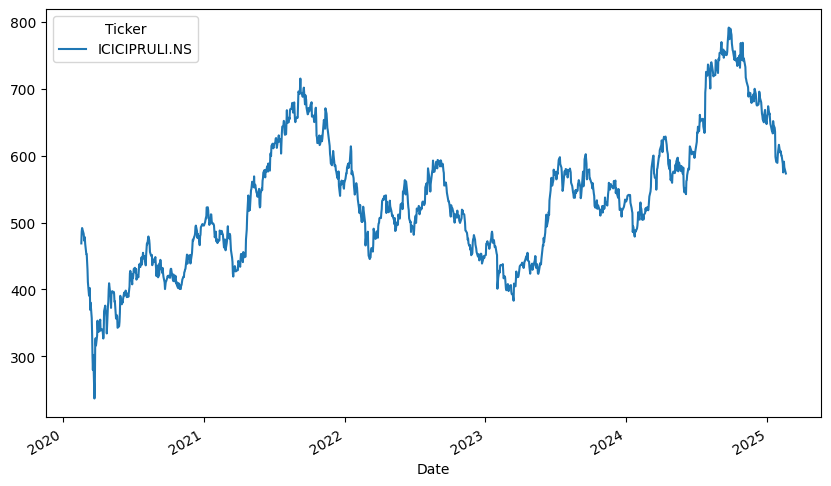

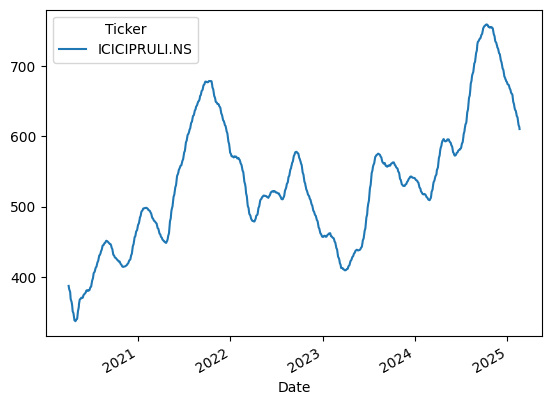

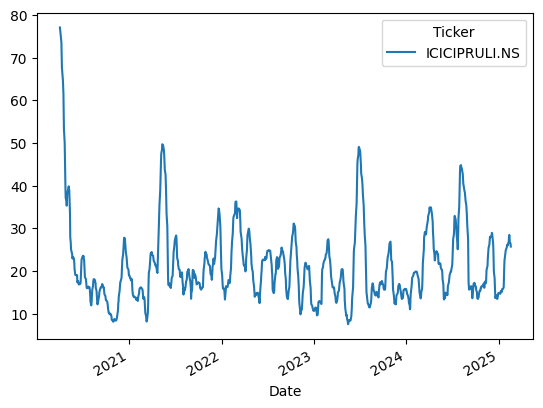

In [15]:
# Plot rolling mean and standard deviation for ICICI Prudential AMC
icici['Close'].plot(label='ICICI Original', figsize=(10,6))
icici['Close'].rolling(window=30).mean().plot(label='ICICI 30-Day Moving Average')
icici['Close'].rolling(window=30).std().plot(label='ICICI 30-Day Moving Std')

<Axes: xlabel='Date'>

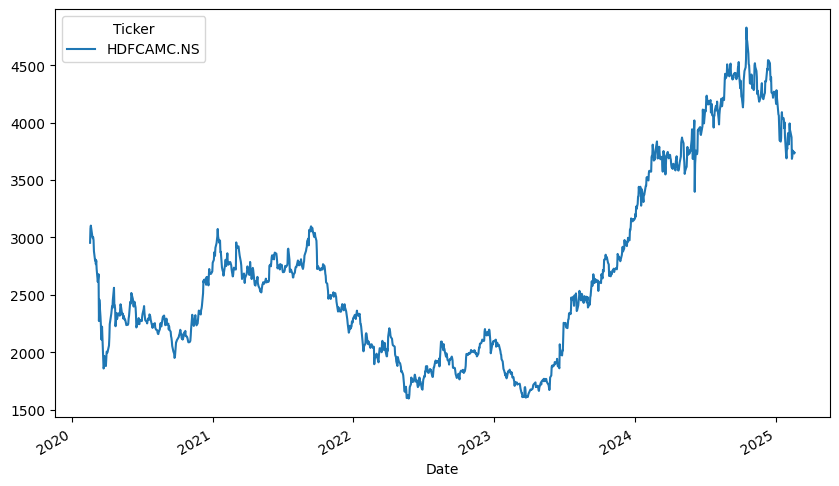

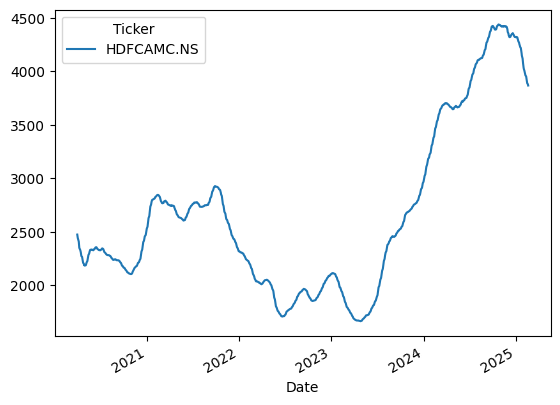

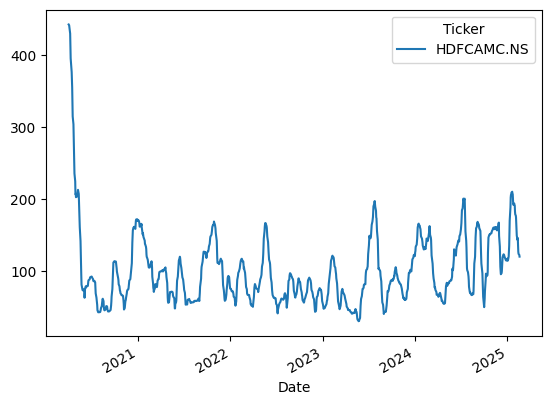

In [16]:
# Plot rolling mean and standard deviation for HDFC AMC
hdfc['Close'].plot(label='HDFC Original', figsize=(10,6))
hdfc['Close'].rolling(window=30).mean().plot(label='HDFC 30-Day Moving Average')
hdfc['Close'].rolling(window=30).std().plot(label='HDFC 30-Day Moving Std')

<Axes: xlabel='Date'>

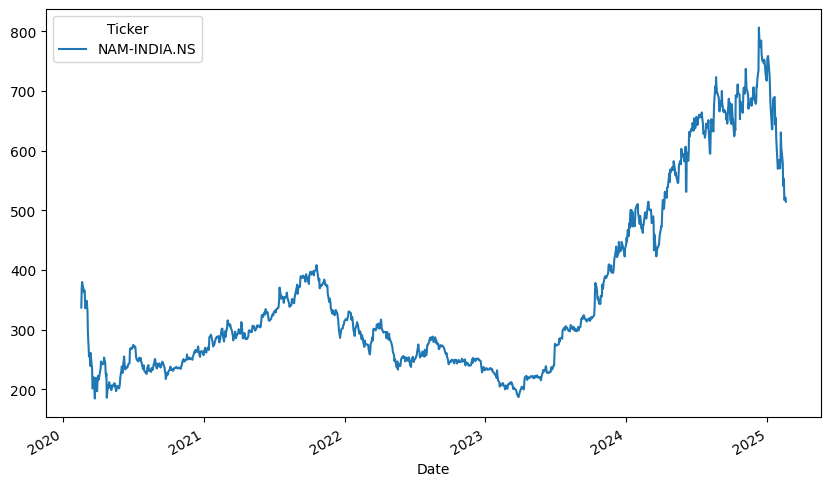

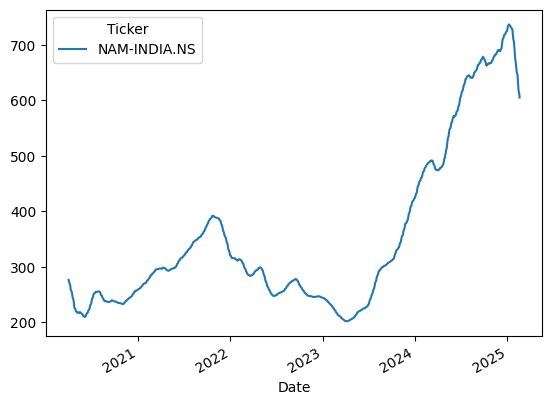

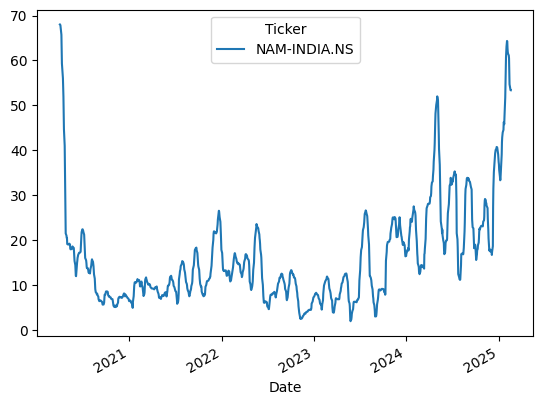

In [17]:
# Plot rolling mean and standard deviation for Nippon AMC
nippon['Close'].plot(label='Nippon Original', figsize=(10,6))
nippon['Close'].rolling(window=30).mean().plot(label='Nippon 30-Day Moving Average')
nippon['Close'].rolling(window=30).std().plot(label='Nippon 30-Day Moving Std')

**Resampling to weekly frequency and apply a 4-week rolling mean**

In [18]:
icici_weekly_rolling = icici['Close'].resample('W').mean().rolling(window=4).mean()
print(icici_weekly_rolling.head())

hdfc_weekly_rolling = hdfc['Close'].resample('W').mean().rolling(window=4).mean()
print(hdfc_weekly_rolling.head())

nippon_weekly_rolling = nippon['Close'].resample('W').mean().rolling(window=4).mean()
print(nippon_weekly_rolling.head())

Ticker      ICICIPRULI.NS
Date                     
2020-02-23            NaN
2020-03-01            NaN
2020-03-08            NaN
2020-03-15     445.453907
2020-03-22     403.478442
Ticker       HDFCAMC.NS
Date                   
2020-02-23          NaN
2020-03-01          NaN
2020-03-08          NaN
2020-03-15  2825.078166
2020-03-22  2613.452881
Ticker      NAM-INDIA.NS
Date                    
2020-02-23           NaN
2020-03-01           NaN
2020-03-08           NaN
2020-03-15    325.889484
2020-03-22    290.302078


In [19]:
# Check for missing values in ICICI Prudential AMC weekly rolling data
icici_weekly_rolling_missing = icici_weekly_rolling.isnull().sum()
print(icici_weekly_rolling_missing)

# Check for missing values in HDFC AMC weekly rolling data
hdfc_weekly_rolling_missing = hdfc_weekly_rolling.isnull().sum()
print(hdfc_weekly_rolling_missing)

# Check for missing values in Nippon AMC weekly rolling data
nippon_weekly_rolling_missing = nippon_weekly_rolling.isnull().sum()
print(nippon_weekly_rolling_missing)


Ticker
ICICIPRULI.NS    3
dtype: int64
Ticker
HDFCAMC.NS    3
dtype: int64
Ticker
NAM-INDIA.NS    3
dtype: int64


In [20]:
#Drop missing values for ICICI Prudential AMC
icici.dropna()

# Fill missing values using backward fill for ICICI Prudential AMC
icici_filled = icici.fillna(method='bfill')

# Check if missing values still exist for ICICI
print(icici_filled.isnull().sum())


Price         Ticker       
Close         ICICIPRULI.NS    0
High          ICICIPRULI.NS    0
Low           ICICIPRULI.NS    0
Open          ICICIPRULI.NS    0
Volume        ICICIPRULI.NS    0
Daily Return                   0
dtype: int64


<ipython-input-20-ac836911d19a>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  icici_filled = icici.fillna(method='bfill')


In [21]:
#Drop missing values for ICICI Prudential AMC
hdfc.dropna()

# Fill missing values using backward fill for ICICI Prudential AMC
hdfc_filled = hdfc.fillna(method='bfill')

# Check if missing values still exist for ICICI
print(hdfc_filled.isnull().sum())

Price         Ticker    
Close         HDFCAMC.NS    0
High          HDFCAMC.NS    0
Low           HDFCAMC.NS    0
Open          HDFCAMC.NS    0
Volume        HDFCAMC.NS    0
Daily Return                0
dtype: int64


<ipython-input-21-359dbfdff530>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hdfc_filled = hdfc.fillna(method='bfill')


In [22]:
#Drop missing values for ICICI Prudential AMC
nippon.dropna()

# Fill missing values using backward fill for ICICI Prudential AMC
nippon_filled = nippon.fillna(method='bfill')

# Check if missing values still exist for ICICI
print(nippon_filled.isnull().sum())

Price         Ticker      
Close         NAM-INDIA.NS    0
High          NAM-INDIA.NS    0
Low           NAM-INDIA.NS    0
Open          NAM-INDIA.NS    0
Volume        NAM-INDIA.NS    0
Daily Return                  0
dtype: int64


<ipython-input-22-09a8be09520c>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nippon_filled = nippon.fillna(method='bfill')


**Handling Outliers**

In [23]:
from scipy import stats

# Drop missing values from 'Daily Return' and calculate Z-scores for ICICI Prudential AMC
icici_daily_returns_clean = icici['Daily Return'].dropna()
icici_z_scores = stats.zscore(icici_daily_returns_clean)

# Define a threshold for outliers (absolute Z-score > 3) for ICICI
icici_outliers = icici_daily_returns_clean[abs(icici_z_scores) > 3]
print(icici_outliers)

# Drop missing values from 'Daily Return' and calculate Z-scores for HDFC AMC
hdfc_daily_returns_clean = hdfc['Daily Return'].dropna()
hdfc_z_scores = stats.zscore(hdfc_daily_returns_clean)

# Define a threshold for outliers (absolute Z-score > 3) for HDFC
hdfc_outliers = hdfc_daily_returns_clean[abs(hdfc_z_scores) > 3]
print(hdfc_outliers)

# Drop missing values from 'Daily Return' and calculate Z-scores for Nippon AMC
nippon_daily_returns_clean = nippon['Daily Return'].dropna()
nippon_z_scores = stats.zscore(nippon_daily_returns_clean)

# Define a threshold for outliers (absolute Z-score > 3) for Nippon
nippon_outliers = nippon_daily_returns_clean[abs(nippon_z_scores) > 3]
print(nippon_outliers)

Date
2020-03-12   -0.081038
2020-03-17   -0.066871
2020-03-18   -0.102056
2020-03-20    0.080448
2020-03-23   -0.214990
2020-03-25    0.259383
2020-04-17    0.104823
2020-04-24   -0.068503
2020-04-27    0.121676
2020-05-18   -0.067559
2020-05-29    0.069078
2022-02-24   -0.067099
2023-02-01   -0.111516
2024-07-24    0.087484
Name: Daily Return, dtype: float64
Date
2020-03-12   -0.152176
2020-03-13    0.082207
2020-03-16   -0.061023
2020-03-23   -0.128749
2020-04-21   -0.059598
2020-04-24   -0.063079
2020-09-28    0.066706
2021-03-03    0.086841
2022-02-24   -0.074166
2022-04-01    0.060786
2022-08-16    0.114925
2023-06-20    0.112262
2023-06-30    0.119829
2024-06-04   -0.154711
2024-06-05    0.071730
Name: Daily Return, dtype: float64
Date
2020-02-19    0.095293
2020-03-06   -0.106295
2020-03-09   -0.138106
2020-03-13    0.089767
2020-03-16   -0.083526
2020-03-18   -0.141785
2020-03-20    0.091780
2020-03-23   -0.099864
2020-03-25    0.086552
2020-03-26    0.092934
2020-03-31    0.08

In [24]:
# Define a threshold value for outliers, for example, 5% (0.05)
threshold = 0.05  # significance level

# Apply clipping to 'Daily Return' column for ICICI Prudential AMC
icici['Daily Return'] = icici['Daily Return'].clip(lower=-threshold, upper=threshold)
print(icici['Daily Return'].describe())

# Apply clipping to 'Daily Return' column for HDFC AMC
hdfc['Daily Return'] = hdfc['Daily Return'].clip(lower=-threshold, upper=threshold)
print(hdfc['Daily Return'].describe())

# Apply clipping to 'Daily Return' column for Nippon AMC
nippon['Daily Return'] = nippon['Daily Return'].clip(lower=-threshold, upper=threshold)
print(nippon['Daily Return'].describe())

count    1238.000000
mean        0.000355
std         0.018441
min        -0.050000
25%        -0.010652
50%         0.000114
75%         0.011130
max         0.050000
Name: Daily Return, dtype: float64
count    1239.000000
mean        0.000393
std         0.017454
min        -0.050000
25%        -0.009305
50%         0.000105
75%         0.009568
max         0.050000
Name: Daily Return, dtype: float64
count    1239.000000
mean        0.000579
std         0.020217
min        -0.050000
25%        -0.010997
50%         0.000000
75%         0.012565
max         0.050000
Name: Daily Return, dtype: float64


In [25]:
from datetime import datetime, timedelta

# Calculate the start date as 3 years from today
start_date = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

# List of tickers for ICICI Prudential AMC, HDFC AMC, and NIPPON AMC
tickers = ['ICICIPRULI.NS', 'HDFCAMC.NS', 'NAM-INDIA.NS']

# Download stock data for the tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Save the 'Close' prices to a CSV file
close_prices = data['Close']
print(close_prices.head())

# Save the data to CSV file
close_prices.to_csv('ICICI_HDFC_NIPPON_last_3_years.csv')

print('Data saved to ICICI_HDFC_NIPPON_last_3_years.csv')


[*********************100%***********************]  3 of 3 completed


Ticker       HDFCAMC.NS  ICICIPRULI.NS  NAM-INDIA.NS
Date                                                
2022-02-21  2035.927856     508.974823    271.306946
2022-02-22  2045.820923     503.541656    281.705750
2022-02-23  2046.992920     499.205078    278.224609
2022-02-24  1895.176514     465.708740    277.019562
2022-02-25  1951.345825     475.976959    276.037720
Data saved to ICICI_HDFC_NIPPON_last_3_years.csv


## **Time Series Forecasting**

In [26]:
# Loading the uploaded stock price data
data = pd.read_csv("ICICI_HDFC_NIPPON_last_3_years.csv")
h = data[["Date", "HDFCAMC.NS"]]
i = data[["Date", "ICICIPRULI.NS"]]
n = data[["Date", "NAM-INDIA.NS"]]

In [27]:
i = i.dropna()
# dropping missing values in icici

In [28]:
# Convert the 'Date' column to datetime and set it as the index
h['Date'] = pd.to_datetime(h['Date'])
h.set_index('Date', inplace=True)

i['Date'] = pd.to_datetime(i['Date'])
i.set_index('Date', inplace=True)

n['Date'] = pd.to_datetime(n['Date'])
n.set_index('Date', inplace=True)

<ipython-input-28-6f7a8ebfa4c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['Date'] = pd.to_datetime(h['Date'])
<ipython-input-28-6f7a8ebfa4c0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['Date'] = pd.to_datetime(n['Date'])


In [29]:
# Resample the data to daily frequency
h = h.asfreq('D', method='pad')
i = i.asfreq('D', method='pad')
n = n.asfreq('D', method='pad')

In [30]:
print(h.head())
print(i.head())
print(n.head())

             HDFCAMC.NS
Date                   
2022-02-21  2035.927856
2022-02-22  2045.820923
2022-02-23  2046.992920
2022-02-24  1895.176514
2022-02-25  1951.345825
            ICICIPRULI.NS
Date                     
2022-02-21     508.974823
2022-02-22     503.541656
2022-02-23     499.205078
2022-02-24     465.708740
2022-02-25     475.976959
            NAM-INDIA.NS
Date                    
2022-02-21    271.306946
2022-02-22    281.705750
2022-02-23    278.224609
2022-02-24    277.019562
2022-02-25    276.037720


**Performing seasonal decomposition**

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

<Figure size 1200x800 with 0 Axes>

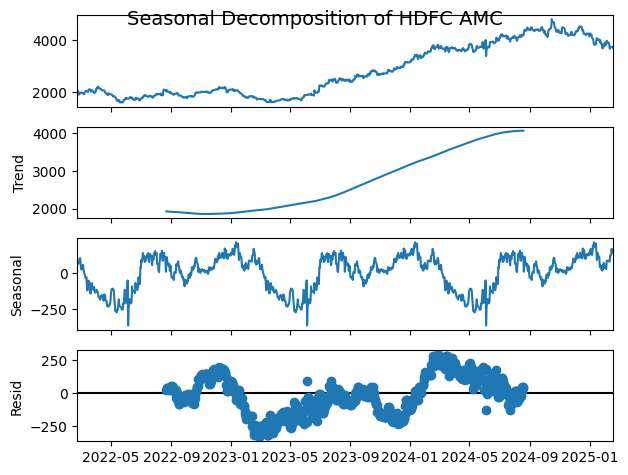

In [32]:
# Decompose and plot for HDFC AMC
decomposition_h = seasonal_decompose(h, model='additive', period=365)
plt.figure(figsize=(12, 8))
decomposition_h.plot()
plt.suptitle("Seasonal Decomposition of HDFC AMC", fontsize=14)
plt.show()

<Figure size 1200x800 with 0 Axes>

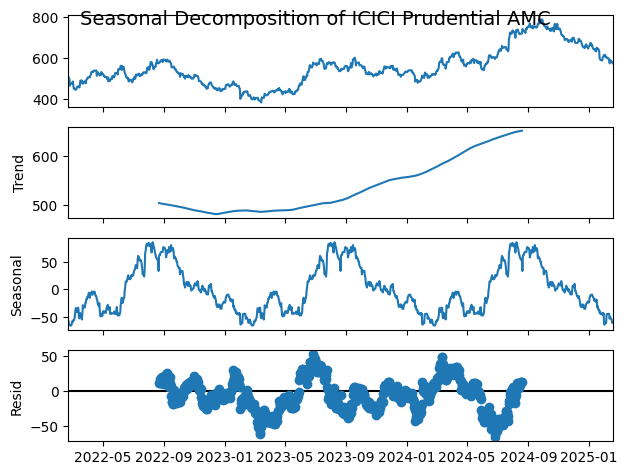

In [33]:
# Decompose and plot for ICICI Prudential AMC
decomposition_i = seasonal_decompose(i, model='additive', period=365)
plt.figure(figsize=(12, 8))
decomposition_i.plot()
plt.suptitle("Seasonal Decomposition of ICICI Prudential AMC", fontsize=14)
plt.show()

<Figure size 1200x800 with 0 Axes>

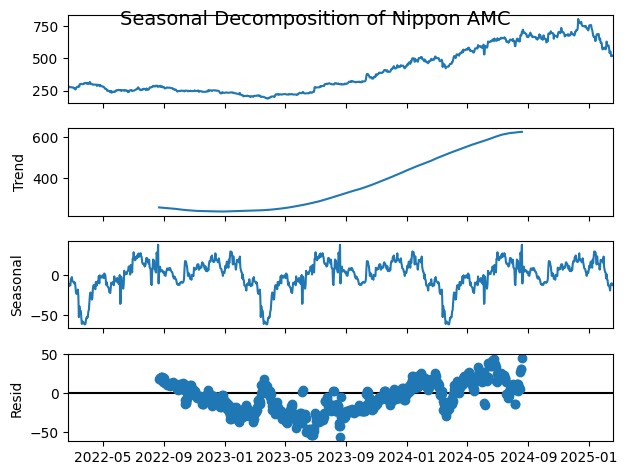

In [34]:
# Decompose and plot for Nippon AMC
decomposition_n = seasonal_decompose(n, model='additive', period=365)
plt.figure(figsize=(12, 8))
decomposition_n.plot()
plt.suptitle("Seasonal Decomposition of Nippon AMC", fontsize=14)
plt.show()

### **Augmented Dickey-Fuller (ADF) test**

**Taking null hypothesis as "Data is non-stationary".**

In [35]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'Adj Close' series for HDFC AMC
adf_result_h = adfuller(h["HDFCAMC.NS"])
adf_statistic_h = adf_result_h[0]
p_value_h = adf_result_h[1]
critical_values_h = adf_result_h[4]

# Perform the ADF test on the 'Adj Close' series for ICICI Prudential AMC
adf_result_i = adfuller(i["ICICIPRULI.NS"])
adf_statistic_i = adf_result_i[0]
p_value_i = adf_result_i[1]
critical_values_i = adf_result_i[4]

# Perform the ADF test on the 'Adj Close' series for Nippon AMC
adf_result_n = adfuller(n["NAM-INDIA.NS"])
adf_statistic_n = adf_result_n[0]
p_value_n = adf_result_n[1]
critical_values_n = adf_result_n[4]

In [36]:
(adf_statistic_h, p_value_h, critical_values_h)

(-0.43263807112966535,
 0.9045051146341277,
 {'1%': -3.4364533503600962,
  '5%': -2.864234857527328,
  '10%': -2.568204837482531})

In [37]:
(adf_statistic_i, p_value_i, critical_values_i)

(-1.4717391098993853,
 0.5474424155940109,
 {'1%': -3.436352507699052, '5%': -2.86419037625175, '10%': -2.56818114683546})

In [38]:
(adf_statistic_n, p_value_n, critical_values_n)

(-0.8326239767499403,
 0.8093507207477344,
 {'1%': -3.4364647646486093,
  '5%': -2.864239892228526,
  '10%': -2.5682075189699822})

Since all the p-values are higher than the common significance level of 0.05, we fail to reject the null hypothesis that the data is non-stationary.

This means the data is non-stationary, and we need to apply techniques like differencing to achieve stationarity.

### **Determining the Right Order of Differencing**

To achieve stationarity, we apply differencing. We can use the Autocorrelation Function (ACF) plot to determine the appropriate number of differencing steps.

Let's first plot the ACF of the data and see how it behaves after differencing

<Figure size 800x600 with 0 Axes>

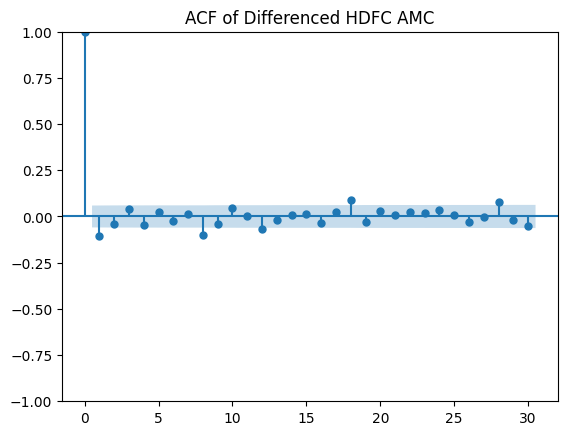

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import matplotlib.pyplot as plt

# Perform first differencing for HDFC AMC
h_diff = h["HDFCAMC.NS"].diff().dropna()

# Plot ACF for differenced data of HDFC AMC
plt.figure(figsize=(8, 6))
plot_acf(h_diff, lags=30)
plt.title("ACF of Differenced HDFC AMC")
plt.show()

<Figure size 800x600 with 0 Axes>

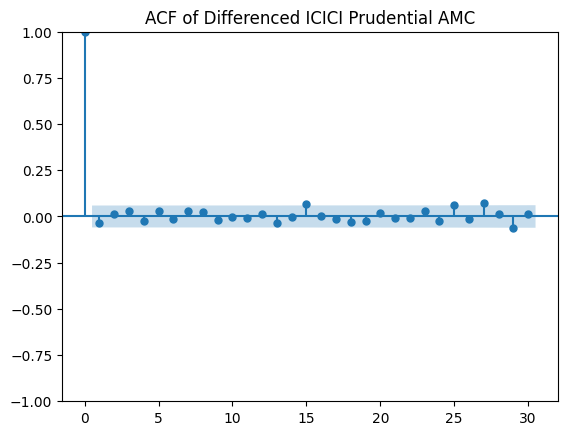

In [40]:
# Perform first differencing for ICICI Prudential AMC
i_diff = i["ICICIPRULI.NS"].diff().dropna()

# Plot ACF for differenced data of ICICI Prudential AMC
plt.figure(figsize=(8, 6))
plot_acf(i_diff, lags=30)
plt.title("ACF of Differenced ICICI Prudential AMC")
plt.show()

<Figure size 800x600 with 0 Axes>

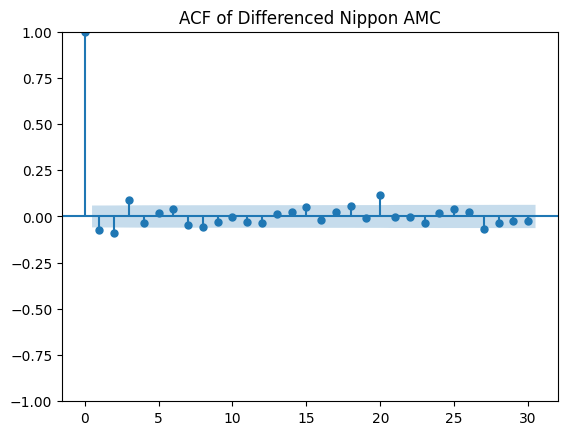

In [41]:
# Perform first differencing for Nippon AMC
n_diff = n["NAM-INDIA.NS"].diff().dropna()

# Plot ACF for differenced data of Nippon AMC
plt.figure(figsize=(8, 6))
plot_acf(n_diff, lags=30)
plt.title("ACF of Differenced Nippon AMC")
plt.show()

**The Autocorrelation Function (ACF) plots shows significant autocorrelations at lag 1 and gradually diminishes afterward, which indicates that the first differencing may be sufficient to achieve stationarity.**

### **ARIMA Modelling**

The three main parameters:

p: The number of lag observations (AutoRegressive term).

d: The number of times the series needs to be differenced (Integrated term).

q: The size of the moving average window (Moving Average term).

**Let's proceed with determining the appropriate p and q values using the Partial Autocorrelation Function (PACF) and the ACF plots.**


<Figure size 800x600 with 0 Axes>

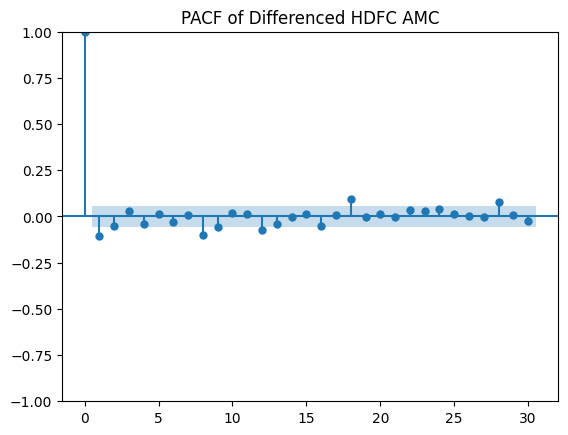

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Plot PACF for the differenced data of HDFC AMC
plt.figure(figsize=(8, 6))
plot_pacf(h_diff, lags=30)
plt.title("PACF of Differenced HDFC AMC")
plt.show()

<Figure size 800x600 with 0 Axes>

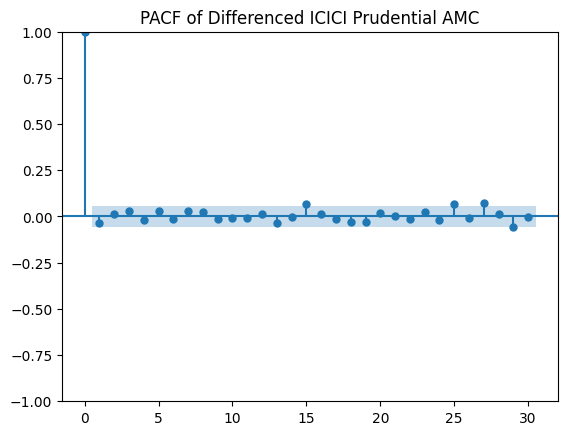

In [43]:
# Plot PACF for the differenced data of ICICI Prudential AMC
plt.figure(figsize=(8, 6))
plot_pacf(i_diff, lags=30)
plt.title("PACF of Differenced ICICI Prudential AMC")
plt.show()

<Figure size 800x600 with 0 Axes>

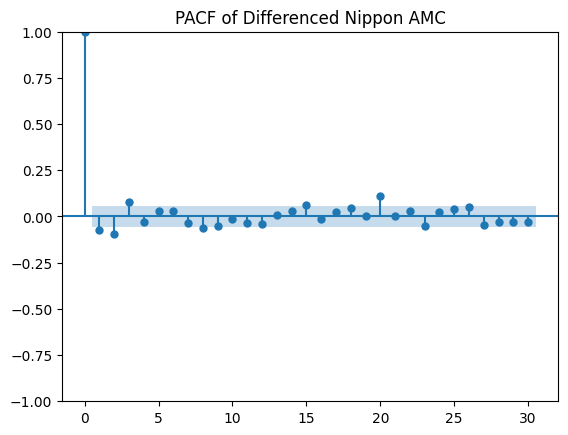

In [44]:
# Plot PACF for the differenced data of Nippon AMC
plt.figure(figsize=(8, 6))
plot_pacf(n_diff, lags=30)
plt.title("PACF of Differenced Nippon AMC")
plt.show()

**Finding the Best ARIMA Model**

To fine-tune the model, we use information criteria like Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). These metrics help in comparing different models and selecting the one that balances model complexity and goodness of fit.

We'll try different combinations of p, d, and q, and evaluate the models using AIC and BIC.

Let's test the ARIMA model with the initial guess of (p=1, d=1, q=1) and evaluate its performance

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
# Build and fit the ARIMA model for HDFC AMC (p=1, d=1, q=1)
model_h = ARIMA(h["HDFCAMC.NS"], order=(1, 1, 1))
arima_result_h = model_h.fit()

# Extract AIC and BIC for HDFC AMC
aic_h = arima_result_h.aic
bic_h = arima_result_h.bic

# Build and fit the ARIMA model for ICICI Prudential AMC (p=1, d=1, q=1)
model_i = ARIMA(i["ICICIPRULI.NS"], order=(1, 1, 1))
arima_result_i = model_i.fit()

# Extract AIC and BIC for ICICI Prudential AMC
aic_i = arima_result_i.aic
bic_i = arima_result_i.bic

# Build and fit the ARIMA model for Nippon AMC (p=1, d=1, q=1)
model_n = ARIMA(n["NAM-INDIA.NS"], order=(1, 1, 1))
arima_result_n = model_n.fit()

# Extract AIC and BIC for Nippon AMC
aic_n = arima_result_n.aic
bic_n = arima_result_n.bic

In [47]:
# Display AIC and BIC values
(aic_h, bic_h)

(11537.491613707069, 11552.478912175982)

In [48]:
(aic_i, bic_i)

(7601.55780605016, 7616.545104519075)

In [49]:
(aic_n, bic_n)

(7927.260864401077, 7942.248162869992)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

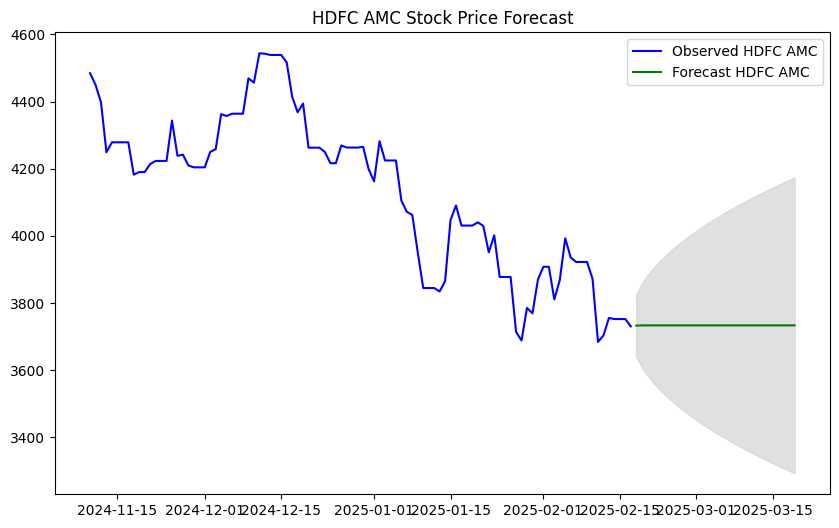

In [51]:
# Generate a forecast for the next 30 days for HDFC AMC
forecast_steps = 30
forecast_h = arima_result_h.get_forecast(steps=forecast_steps)
forecast_mean_h = forecast_h.predicted_mean
forecast_ci_h = forecast_h.conf_int()

# Plot the forecast for HDFC AMC
plt.figure(figsize=(10, 6))
plt.plot(h.index[-100:], h["HDFCAMC.NS"][-100:], label='Observed HDFC AMC', color='blue')
plt.plot(forecast_mean_h.index, forecast_mean_h, label='Forecast HDFC AMC', color='green')
plt.fill_between(forecast_ci_h.index, forecast_ci_h.iloc[:, 0], forecast_ci_h.iloc[:, 1], color='lightgray', alpha=0.7)
plt.title('HDFC AMC Stock Price Forecast')
plt.legend()
plt.show()

In [52]:
# Calculate the forecast for the training set (in-sample forecast) for HDFC AMC
in_sample_forecast_h = arima_result_h.predict(start=h.index[1], end=h.index[-1], typ='levels')

# Calculate accuracy metrics for HDFC AMC
mae_h = mean_absolute_error(h[1:], in_sample_forecast_h)
mse_h = mean_squared_error(h[1:], in_sample_forecast_h)
rmse_h = np.sqrt(mse_h)

(mae_h, mse_h, rmse_h)

(26.56200157531195, 2257.66269955714, 47.51486819467292)

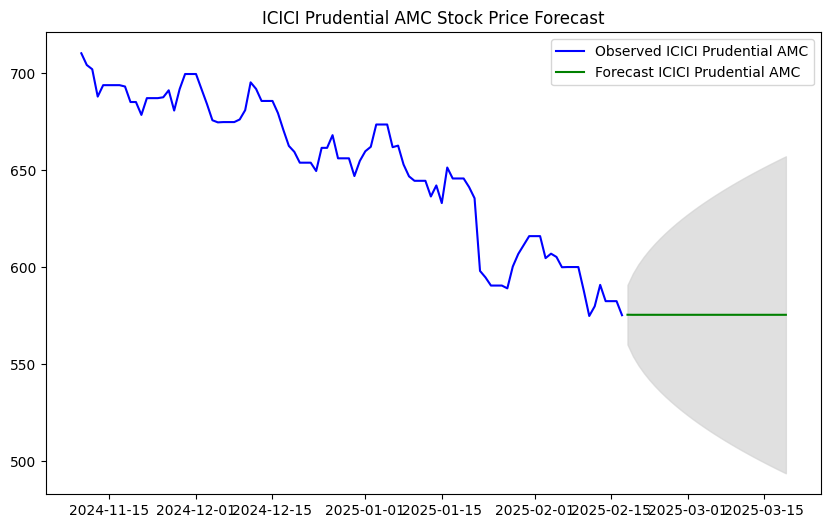

In [53]:
# Generate forecast and accuracy metrics for ICICI Prudential AMC
forecast_i = arima_result_i.get_forecast(steps=forecast_steps)
forecast_mean_i = forecast_i.predicted_mean
forecast_ci_i = forecast_i.conf_int()

# Plot the forecast for ICICI Prudential AMC
plt.figure(figsize=(10, 6))
plt.plot(i.index[-100:], i["ICICIPRULI.NS"][-100:], label='Observed ICICI Prudential AMC', color='blue')
plt.plot(forecast_mean_i.index, forecast_mean_i, label='Forecast ICICI Prudential AMC', color='green')
plt.fill_between(forecast_ci_i.index, forecast_ci_i.iloc[:, 0], forecast_ci_i.iloc[:, 1], color='lightgray', alpha=0.7)
plt.title('ICICI Prudential AMC Stock Price Forecast')
plt.legend()
plt.show()

In [54]:
# In-sample forecast and accuracy metrics for ICICI Prudential AMC
in_sample_forecast_i = arima_result_i.predict(start=i.index[1], end=i.index[-1], typ='levels')

mae_i = mean_absolute_error(i[1:], in_sample_forecast_i)
mse_i = mean_squared_error(i[1:], in_sample_forecast_i)
rmse_i = np.sqrt(mse_i)

(mae_i, mse_i, rmse_i)

(4.9071712569971435, 61.42158844930638, 7.837192638266995)

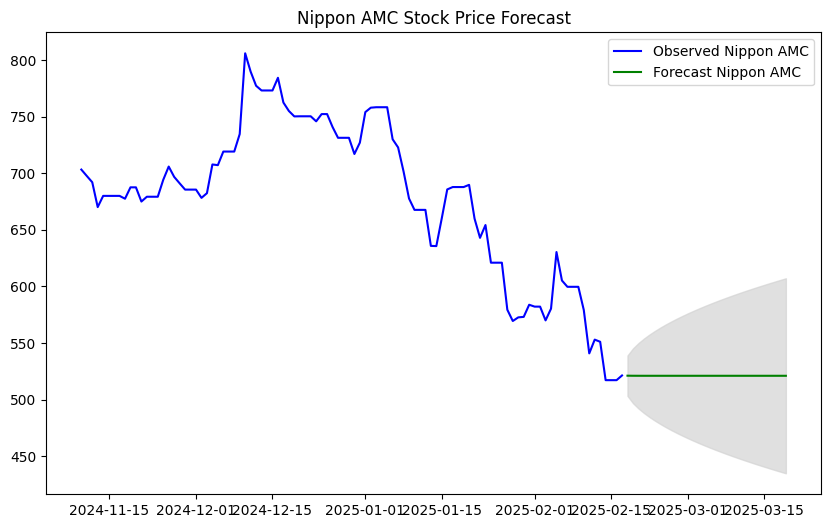

In [55]:
# Generate forecast and accuracy metrics for Nippon AMC
forecast_n = arima_result_n.get_forecast(steps=forecast_steps)
forecast_mean_n = forecast_n.predicted_mean
forecast_ci_n = forecast_n.conf_int()

# Plot the forecast for Nippon AMC
plt.figure(figsize=(10, 6))
plt.plot(n.index[-100:], n["NAM-INDIA.NS"][-100:], label='Observed Nippon AMC', color='blue')
plt.plot(forecast_mean_n.index, forecast_mean_n, label='Forecast Nippon AMC', color='green')
plt.fill_between(forecast_ci_n.index, forecast_ci_n.iloc[:, 0], forecast_ci_n.iloc[:, 1], color='lightgray', alpha=0.7)
plt.title('Nippon AMC Stock Price Forecast')
plt.legend()
plt.show()

In [56]:
# In-sample forecast and accuracy metrics for Nippon AMC
in_sample_forecast_n = arima_result_n.predict(start=n.index[1], end=n.index[-1], typ='levels')

mae_n = mean_absolute_error(n[1:], in_sample_forecast_n)
mse_n = mean_squared_error(n[1:], in_sample_forecast_n)
rmse_n = np.sqrt(mse_n)

(mae_n, mse_n, rmse_n)

(4.791682287033188, 82.76671577544711, 9.097621435048126)

### **Automated Approach**
An automated grid search using libraries such as pmdarima can help find the best ARIMA parameters based on AIC or BIC. This approach is faster and more efficient.

Let’s try an automated approach using the pmdarima library to find the optimal ARIMA parameters.

**Automated ARIMA Parameter Tuning**

We’ll use the auto_arima function to automatically search for the best combination of 𝑝 p, 𝑑 d, and 𝑞 q by minimizing the AIC.

Let's proceed to fine-tune the ARIMA model parameters.

In [57]:
!pip install pmdarima
import pmdarima as pm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11548.814, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11538.016, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11536.824, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11547.964, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11537.887, Time=1.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11537.494, Time=2.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11534.543, Time=3.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11536.274, Time=4.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11536.352, Time=6.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11538.437, Time=2.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11534.278, Time=5.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11537.041, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11536.275, Time=9.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11538.182, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11535.707, Time=2.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11533.785, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11537.492, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=11536.627, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=11535.784, Time=0.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=11535.784, Time=0.96 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11537.445, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11534.109, Time=0.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0]             : AIC=11537.670, Time=0.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=11535.904, Time=1.06 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 45.701 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1093
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -5762.892
Date:                Tue, 18 Feb 2025   AIC                          11533.785
Time:                        16:50:59   BIC                          11553.768
Sample:                    02-21-2022   HQIC                         11541.347
                         - 02-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9072      0.114     -7.954      0.000      -1.13

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


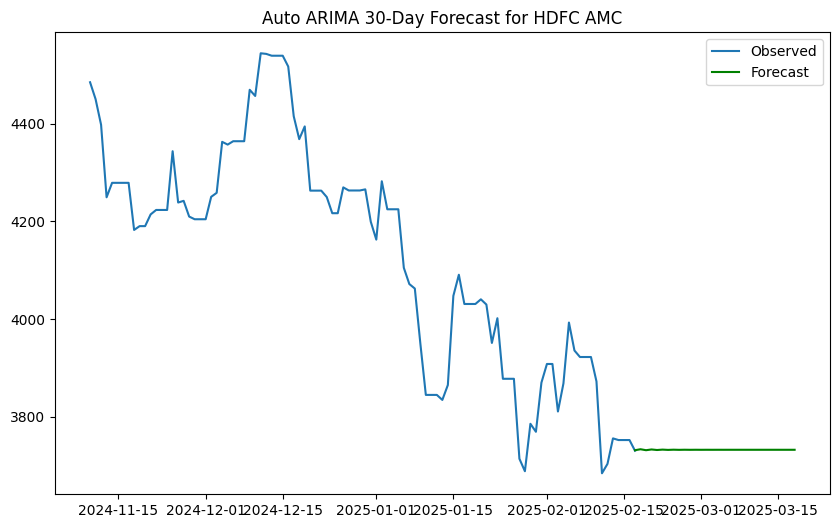

In [58]:
# Run auto_arima to find the best ARIMA model
auto_model_hdfc = pm.auto_arima(h,
                                start_p=0, start_q=0,
                                test='adf',
                                max_p=5, max_q=5,
                                seasonal=False,
                                trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)

# Print the summary of the best model
print(auto_model_hdfc.summary())

# Forecast the next 30 days
forecast_hdfc = auto_model_hdfc.predict(n_periods=30)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(h.index[-100:], h[-100:], label='Observed')
plt.plot(pd.date_range(h.index[-1], periods=30, freq='D'), forecast_hdfc, label='Forecast', color='green')
plt.title('Auto ARIMA 30-Day Forecast for HDFC AMC')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7600.792, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7601.570, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7601.609, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7598.858, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7603.488, Time=0.41 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.908 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1093
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3798.429
Date:                Tue, 18 Feb 2025   AIC                           7598.858
Time:                        16:51:00   BIC                           7603.853
Sample:                    02-21-2022   HQIC                          7600.748
                         - 02-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        61.4962      1.357     45.317      0.000      58.837 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


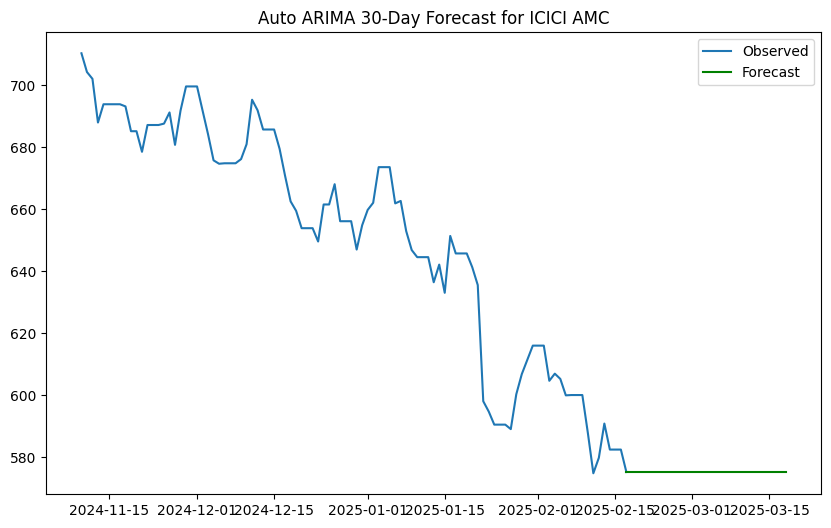

In [59]:
# Run auto_arima to find the best ARIMA model
auto_model_icici = pm.auto_arima(i,
                                 start_p=0, start_q=0,
                                 test='adf',
                                 max_p=5, max_q=5,
                                 seasonal=False,
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)

# Print the summary of the best model
print(auto_model_icici.summary())

# Forecast the next 30 days
forecast_icici = auto_model_icici.predict(n_periods=30)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(i.index[-100:], i[-100:], label='Observed')
plt.plot(pd.date_range(i.index[-1], periods=30, freq='D'), forecast_icici, label='Forecast', color='green')
plt.title('Auto ARIMA 30-Day Forecast for ICICI AMC')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7933.934, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7929.788, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7928.535, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7932.620, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7928.366, Time=1.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7916.989, Time=2.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7921.884, Time=1.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7918.113, Time=5.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7917.721, Time=5.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7918.697, Time=1.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7917.405, Time=1.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7919.616, Time=12.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7915.893, Time=0.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7927.261, Time=2.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7920.834, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=7916.966, Time=1.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=7916.576, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7928.579, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7917.615, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=7916.222, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=7918.486, Time=0.89 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 40.811 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1093
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3953.947
Date:                Tue, 18 Feb 2025   AIC                           7915.893
Time:                        16:51:41   BIC                           7935.876
Sample:                    02-21-2022   HQIC                          7923.456
                         - 02-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6180      0.132     -4.677      0.000      -0.877

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


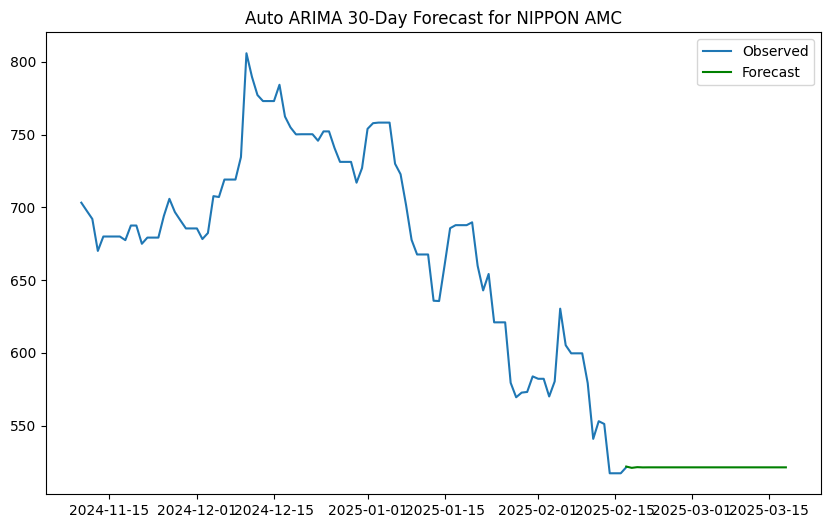

In [60]:
# Run auto_arima to find the best ARIMA model
auto_model_nippon = pm.auto_arima(n,
                                  start_p=0, start_q=0,
                                  test='adf',
                                  max_p=5, max_q=5,
                                  seasonal=False,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

# Print the summary of the best model
print(auto_model_nippon.summary())

# Forecast the next 30 days
forecast_nippon = auto_model_nippon.predict(n_periods=30)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(n.index[-100:], n[-100:], label='Observed')
plt.plot(pd.date_range(n.index[-1], periods=30, freq='D'), forecast_nippon, label='Forecast', color='green')
plt.title('Auto ARIMA 30-Day Forecast for NIPPON AMC')
plt.legend()
plt.show()

### **Auto ARIMA with seasonal component (SARIMA)**

**Sarima models for each AMC:**

In [61]:
auto_sarima_icici = pm.auto_arima(i,
                                  seasonal=True,
                                  m=12,  # Assuming monthly seasonality
                                  start_p=0, start_q=0,
                                  test='adf',
                                  max_p=3, max_q=3,
                                  start_P=0, start_Q=0,
                                  max_P=3, max_Q=3,
                                  d=1, D=1,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

print(auto_sarima_icici.summary())

forecast_sarima_icici = auto_sarima_icici.predict(n_periods=30)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8238.116, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7964.831, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.90 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8239.978, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7808.585, Time=1.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=7768.347, Time=4.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=31.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=7768.844, Time=2.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=7770.262, Time=6.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=7770.306, Time=5.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=7768.402, Time=3.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=7771.737, Time=10.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12] intercept   : AIC=7770.335, Time=15.31 sec

Best model:  ARIMA(1,1,0)(3,1,0)[12]          
Total fit time: 100.707 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1093
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -3879.173
Date:                            Tue, 18 Feb 2025   AIC                           7768.347
Time:                                    16:53:22   BIC                           7793.271
Sample:                                02-21-2022   HQIC                          7777.784
                                     - 02-17-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [62]:
auto_sarima_hdfc = pm.auto_arima(h,
                                 seasonal=True,
                                 m=12,
                                 start_p=0, start_q=0,
                                 test='adf',
                                 max_p=3, max_q=3,
                                 start_P=0, start_Q=0,
                                 max_P=3, max_Q=3,
                                 d=1, D=1,
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)

print(auto_sarima_hdfc.summary())

forecast_sarima_hdfc = auto_sarima_hdfc.predict(n_periods=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=12236.205, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11841.379, Time=1.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=12228.923, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=11714.292, Time=1.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=11655.552, Time=3.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=15.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=11665.397, Time=1.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=11653.831, Time=6.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=11710.940, Time=2.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=20.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=11.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[12]             : AIC=11655.517, Time=7.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=inf, Time=38.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=11649.544, Time=16.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=11702.481, Time=7.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,1)[12]             : AIC=inf, Time=37.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=15.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=11654.211, Time=5.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(3,1,0)[12]             : AIC=11650.337, Time=12.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(3,1,0)[12]             : AIC=11653.958, Time=6.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(3,1,0)[12]             : AIC=inf, Time=49.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12] intercept   : AIC=11651.419, Time=40.41 sec

Best model:  ARIMA(1,1,1)(3,1,0)[12]          
Total fit time: 314.779 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1093
Model:             SARIMAX(1, 1, 1)x(3, 1, [], 12)   Log Likelihood               -5818.772
Date:                             Tue, 18 Feb 2025   AIC                          11649.544
Time:                                     16:58:37   BIC                          11679.452
Sample:                                 02-21-2022   HQIC                         11660.869
                                      - 02-17-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [63]:
auto_sarima_nippon = pm.auto_arima(n,
                                   seasonal=True,
                                   m=12,
                                   start_p=0, start_q=0,
                                   test='adf',
                                   max_p=3, max_q=3,
                                   start_P=0, start_Q=0,
                                   max_P=3, max_Q=3,
                                   d=1, D=1,
                                   trace=True,
                                   error_action='ignore',
                                   suppress_warnings=True,
                                   stepwise=True)

print(auto_sarima_nippon.summary())

forecast_sarima_nippon = auto_sarima_nippon.predict(n_periods=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8619.192, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8266.444, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8616.959, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8124.523, Time=1.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=8095.397, Time=4.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=17.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=8101.102, Time=1.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=8086.020, Time=3.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=8115.268, Time=2.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=21.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=12.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[12]             : AIC=8083.672, Time=3.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,0)[12]             : AIC=8113.122, Time=2.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,1)[12]             : AIC=inf, Time=23.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=12.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[12]             : AIC=8083.385, Time=5.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,1,0)[12]             : AIC=8112.623, Time=5.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,1)[12]             : AIC=inf, Time=32.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,1,1)[12]             : AIC=inf, Time=20.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=8081.730, Time=5.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,0)[12]             : AIC=8110.840, Time=3.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,1)[12]             : AIC=inf, Time=33.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,1)[12]             : AIC=inf, Time=18.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=8092.385, Time=6.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(3,1,0)[12]             : AIC=8082.780, Time=8.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(3,1,0)[12]             : AIC=8083.100, Time=5.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(3,1,0)[12]             : AIC=8084.557, Time=15.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12] intercept   : AIC=8083.426, Time=28.01 sec

Best model:  ARIMA(2,1,1)(3,1,0)[12]          
Total fit time: 307.836 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1093
Model:             SARIMAX(2, 1, 1)x(3, 1, [], 12)   Log Likelihood               -4033.865
Date:                             Tue, 18 Feb 2025   AIC                           8081.730
Time:                                     17:03:45   BIC                           8116.623
Sample:                                 02-21-2022   HQIC                          8094.943
                                      - 02-17-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Sarima forecast plots for each AMC**

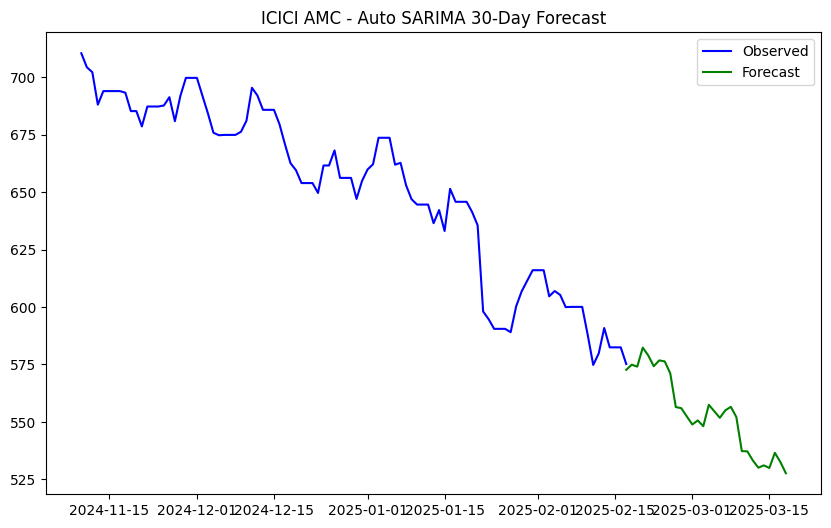

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(i.index[-100:], i[-100:], label='Observed', color='blue')
plt.plot(pd.date_range(i.index[-1], periods=30, freq='D'), forecast_sarima_icici, label='Forecast', color='green')
plt.title('ICICI AMC - Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()

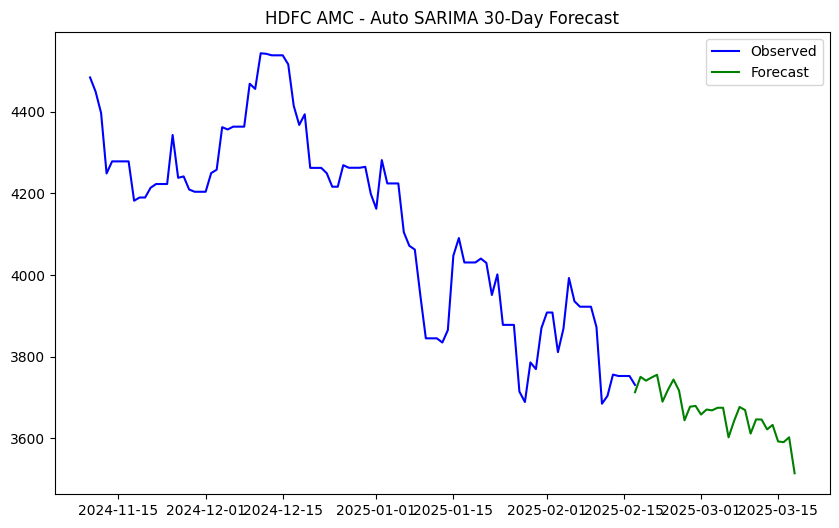

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(h.index[-100:], h[-100:], label='Observed', color='blue')
plt.plot(pd.date_range(h.index[-1], periods=30, freq='D'), forecast_sarima_hdfc, label='Forecast', color='green')
plt.title('HDFC AMC - Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()

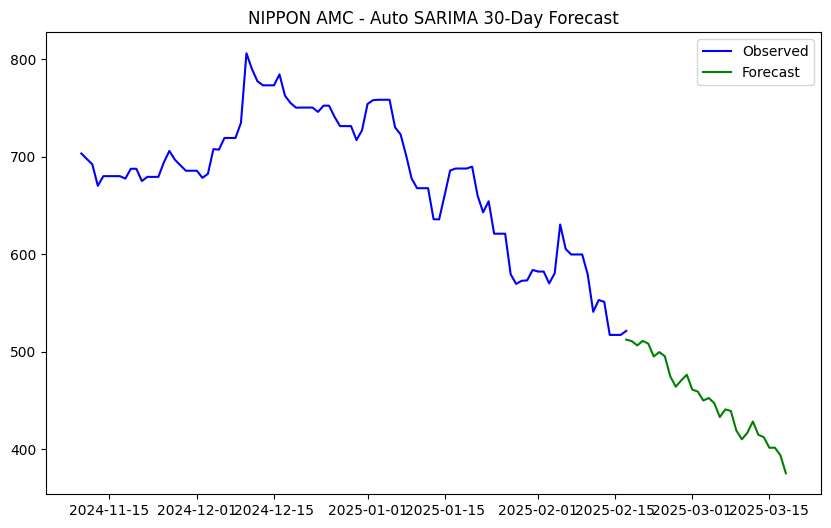

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(n.index[-100:], n[-100:], label='Observed', color='blue')
plt.plot(pd.date_range(n.index[-1], periods=30, freq='D'), forecast_sarima_nippon, label='Forecast', color='green')
plt.title('NIPPON AMC - Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()

### **Plot diagnostics of the fitted SARIMA model to check the residuals**

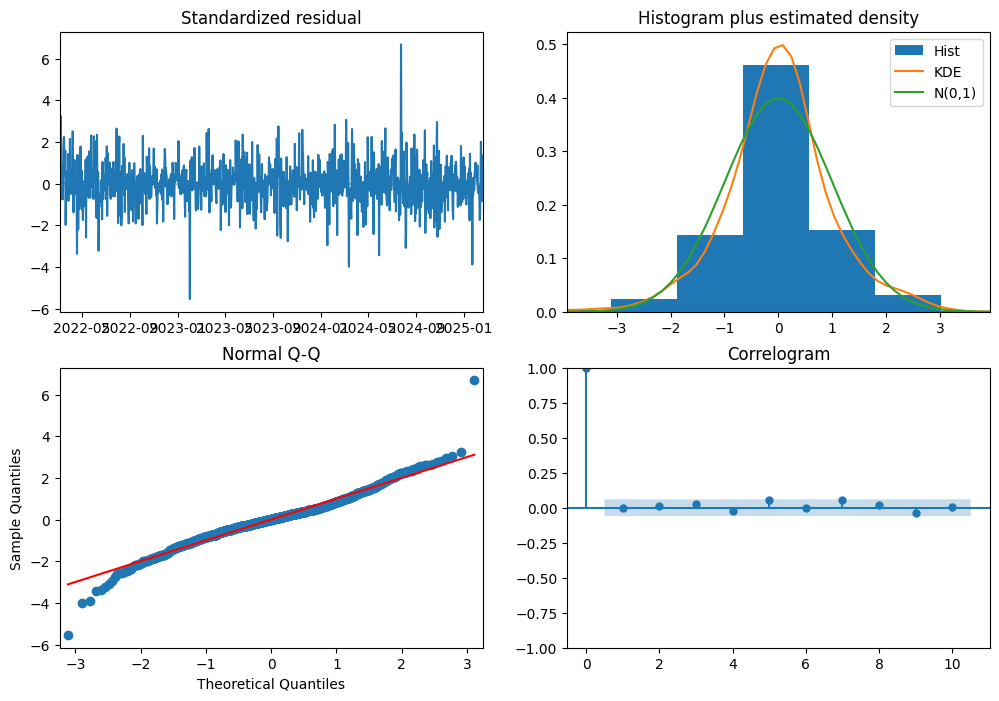

In [67]:
auto_sarima_icici.plot_diagnostics(figsize=(12, 8))
plt.show()

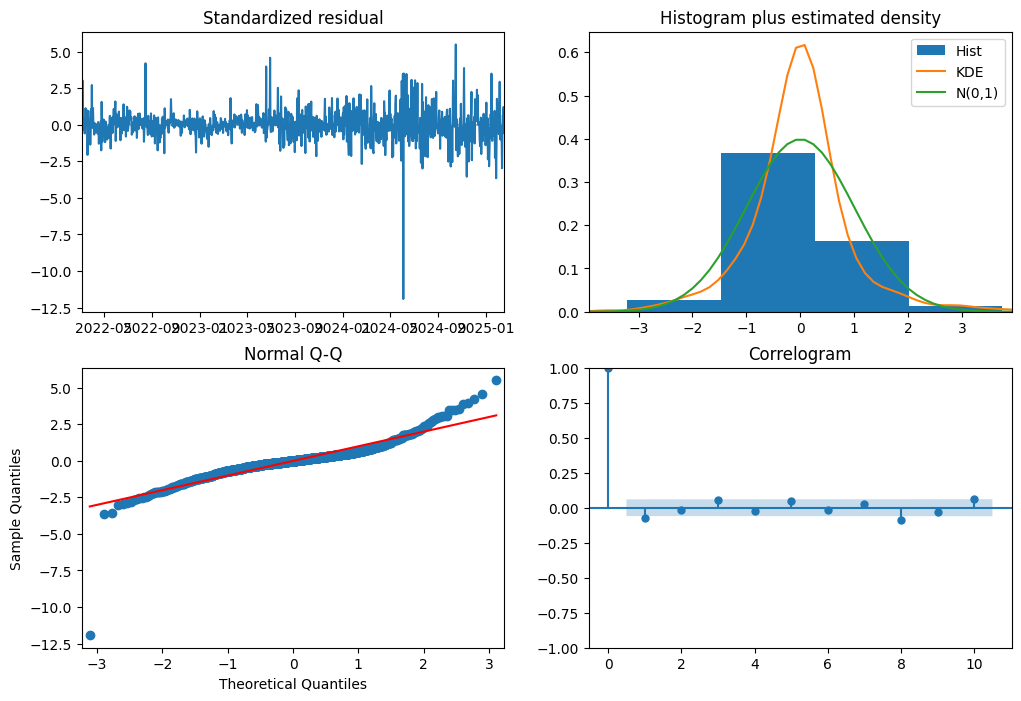

In [68]:
auto_sarima_hdfc.plot_diagnostics(figsize=(12, 8))
plt.show()

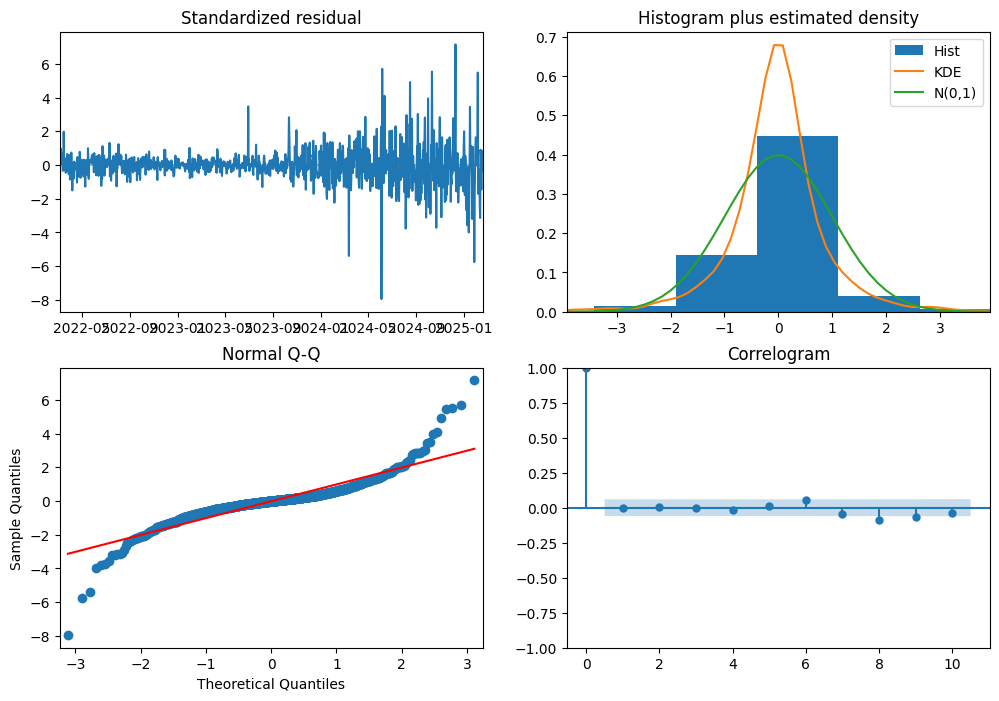

In [69]:
auto_sarima_nippon.plot_diagnostics(figsize=(12, 8))
plt.show()

**Now applying the SARIMA model with quarterly seasonality (m=4)**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=8341.606, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=8000.183, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.87 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=8339.708, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[4]             : AIC=7871.611, Time=1.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[4]             : AIC=7806.192, Time=1.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=2.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=1.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4]             : AIC=7806.070, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[4]             : AIC=7870.490, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,1)[4]             : AIC=inf, Time=2.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=1.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[4]             : AIC=7806.300, Time=0.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[4]             : AIC=7807.902, Time=3.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4] intercept   : AIC=7808.066, Time=1.55 sec

Best model:  ARIMA(0,1,0)(3,1,0)[4]          
Total fit time: 18.346 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1093
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 4)   Log Likelihood               -3899.035
Date:                           Tue, 18 Feb 2025   AIC                           7806.070
Time:                                   17:04:07   BIC                           7826.038
Sample:                               02-21-2022   HQIC                          7813.628
                                    - 02-17-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


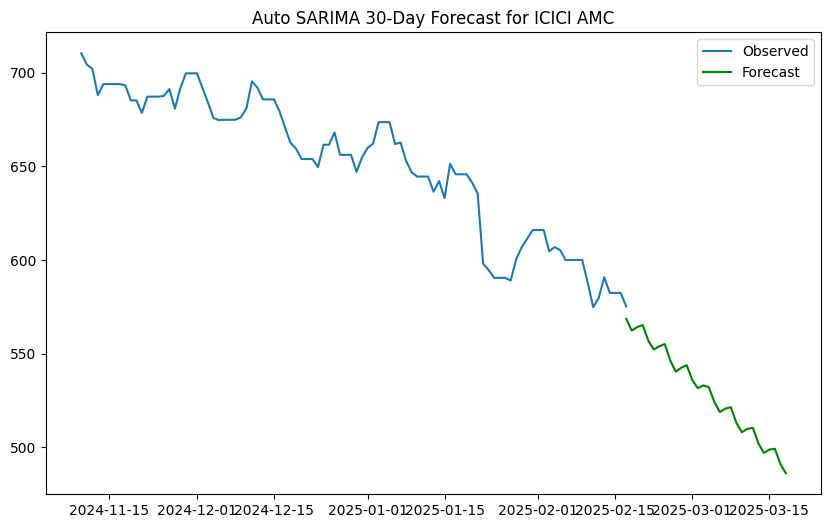

In [70]:
auto_sarima_icici = pm.auto_arima(i,
                                  seasonal=True,
                                  m=4,  # Quarterly seasonality
                                  start_p=0, start_q=0,
                                  test='adf',
                                  max_p=3, max_q=3,
                                  start_P=0, start_Q=0,
                                  max_P=3, max_Q=3,
                                  d=1, D=1,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

# Print the summary of the best model
print(auto_sarima_icici.summary())

# Forecast the next 30 periods
forecast_sarima_icici = auto_sarima_icici.predict(n_periods=30)

# Plot the observed and forecast values
plt.figure(figsize=(10, 6))
plt.plot(i.index[-100:], i[-100:], label='Observed')
plt.plot(pd.date_range(i.index[-1], periods=30, freq='D'), forecast_sarima_icici, label='Forecast', color='green')
plt.title('Auto SARIMA 30-Day Forecast for ICICI AMC')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=12304.640, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=12020.114, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=1.27 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=12287.880, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[4]             : AIC=11888.450, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[4]             : AIC=11802.624, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=2.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=1.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4]             : AIC=11814.060, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[4]             : AIC=11799.105, Time=1.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[4]             : AIC=11887.408, Time=1.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[4]             : AIC=inf, Time=4.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[4]             : AIC=inf, Time=2.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[4]             : AIC=11799.358, Time=1.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[4]             : AIC=inf, Time=7.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[4]             : AIC=inf, Time=5.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[4]             : AIC=inf, Time=8.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[4] intercept   : AIC=11801.104, Time=3.13 sec

Best model:  ARIMA(2,1,0)(3,1,0)[4]          
Total fit time: 42.248 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1093
Model:             SARIMAX(2, 1, 0)x(3, 1, 0, 4)   Log Likelihood               -5893.552
Date:                           Tue, 18 Feb 2025   AIC                          11799.105
Time:                                   17:04:49   BIC                          11829.057
Sample:                               02-21-2022   HQIC                         11810.442
                                    - 02-17-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


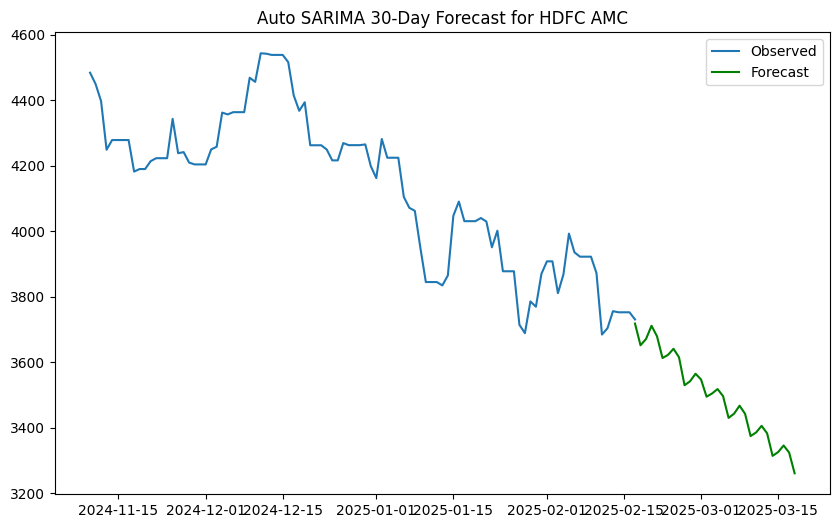

In [71]:
auto_sarima_hdfc = pm.auto_arima(h,
                                  seasonal=True,
                                  m=4,  # Quarterly seasonality
                                  start_p=0, start_q=0,
                                  test='adf',
                                  max_p=3, max_q=3,
                                  start_P=0, start_Q=0,
                                  max_P=3, max_Q=3,
                                  d=1, D=1,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

# Print the summary of the best model
print(auto_sarima_hdfc.summary())

# Forecast the next 30 periods
forecast_sarima_hdfc = auto_sarima_hdfc.predict(n_periods=30)

# Plot the observed and forecast values
plt.figure(figsize=(10, 6))
plt.plot(h.index[-100:], h[-100:], label='Observed')
plt.plot(pd.date_range(h.index[-1], periods=30, freq='D'), forecast_sarima_hdfc, label='Forecast', color='green')
plt.title('Auto SARIMA 30-Day Forecast for HDFC AMC')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=8691.642, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=8389.834, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.71 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=8676.229, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[4]             : AIC=8253.840, Time=0.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[4]             : AIC=8170.298, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=2.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=1.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4]             : AIC=8176.803, Time=0.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[4]             : AIC=8159.437, Time=2.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[4]             : AIC=8246.712, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[4]             : AIC=inf, Time=3.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[4]             : AIC=inf, Time=2.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[4]             : AIC=8156.001, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,0)[4]             : AIC=8242.112, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,1)[4]             : AIC=inf, Time=5.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,1)[4]             : AIC=inf, Time=2.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[4]             : AIC=inf, Time=4.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[4]             : AIC=inf, Time=5.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[4] intercept   : AIC=8157.950, Time=3.42 sec

Best model:  ARIMA(3,1,0)(3,1,0)[4]          
Total fit time: 39.697 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1093
Model:             SARIMAX(3, 1, 0)x(3, 1, 0, 4)   Log Likelihood               -4071.000
Date:                           Tue, 18 Feb 2025   AIC                           8156.001
Time:                                   17:05:29   BIC                           8190.945
Sample:                               02-21-2022   HQIC                          8169.227
                                    - 02-17-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


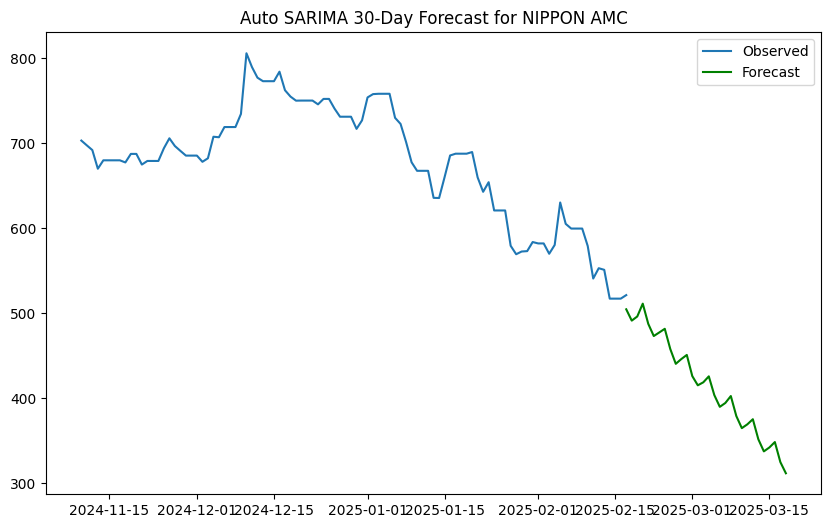

In [72]:
auto_sarima_nippon = pm.auto_arima(n,
                                    seasonal=True,
                                    m=4,  # Quarterly seasonality
                                    start_p=0, start_q=0,
                                    test='adf',
                                    max_p=3, max_q=3,
                                    start_P=0, start_Q=0,
                                    max_P=3, max_Q=3,
                                    d=1, D=1,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)

# Print the summary of the best model
print(auto_sarima_nippon.summary())

# Forecast the next 30 periods
forecast_sarima_nippon = auto_sarima_nippon.predict(n_periods=30)

# Plot the observed and forecast values
plt.figure(figsize=(10, 6))
plt.plot(n.index[-100:], n[-100:], label='Observed')
plt.plot(pd.date_range(n.index[-1], periods=30, freq='D'), forecast_sarima_nippon, label='Forecast', color='green')
plt.title('Auto SARIMA 30-Day Forecast for NIPPON AMC')
plt.legend()
plt.show()

### **Prophet**

In [73]:
!pip install prophet

In [74]:
from prophet import Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/4unh0e1q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/iwubj1bw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71587', 'data', 'file=/tmp/tmph1fkhob7/4unh0e1q.json', 'init=/tmp/tmph1fkhob7/iwubj1bw.json', 'output', 'file=/tmp/tmph1fkhob7/prophet_model4me1k8eh/prophet_model-20250218170534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


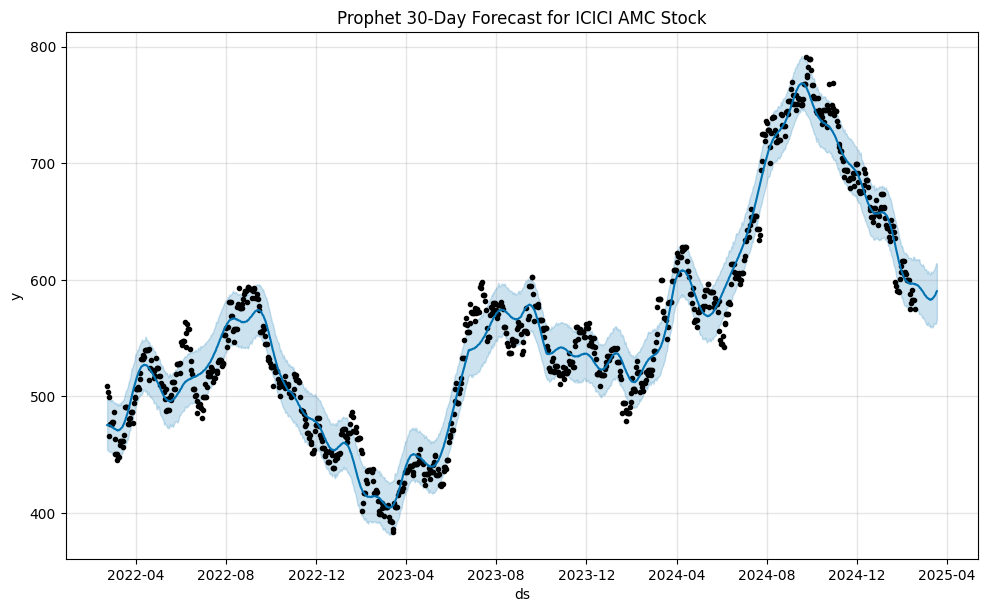

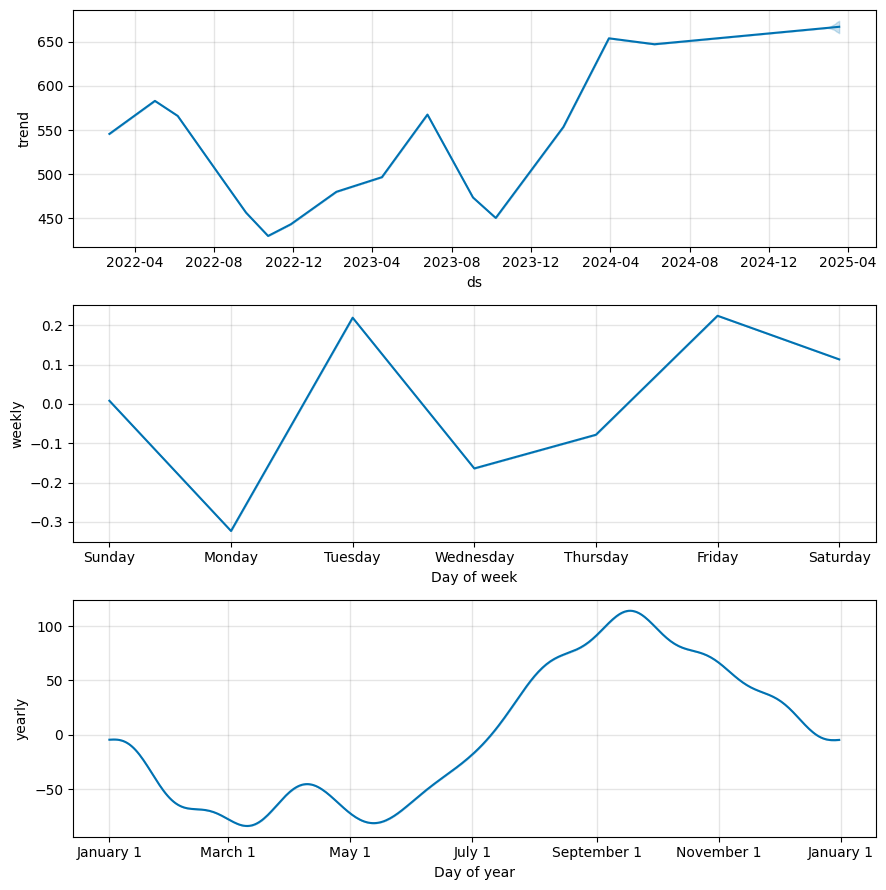

In [75]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_icici = i.reset_index()
prophet_data_icici.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

# Initialize the Prophet model
model_icici = Prophet()

# Fit the model on the historical data
model_icici.fit(prophet_data_icici)

# Forecast for the next 30 days
future_icici = model_icici.make_future_dataframe(periods=30)
forecast_icici = model_icici.predict(future_icici)

# Plot the forecast
fig_icici = model_icici.plot(forecast_icici)
plt.title('Prophet 30-Day Forecast for ICICI AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_icici = model_icici.plot_components(forecast_icici)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/s_ubi0jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/qsr94xwb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4377', 'data', 'file=/tmp/tmph1fkhob7/s_ubi0jy.json', 'init=/tmp/tmph1fkhob7/qsr94xwb.json', 'output', 'file=/tmp/tmph1fkhob7/prophet_modelu68mj836/prophet_model-20250218170539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


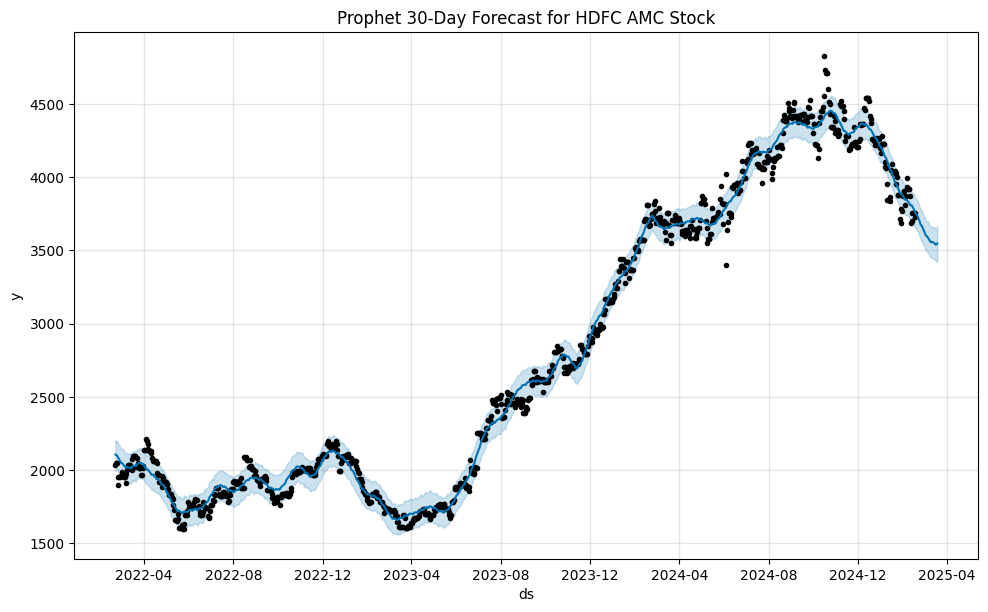

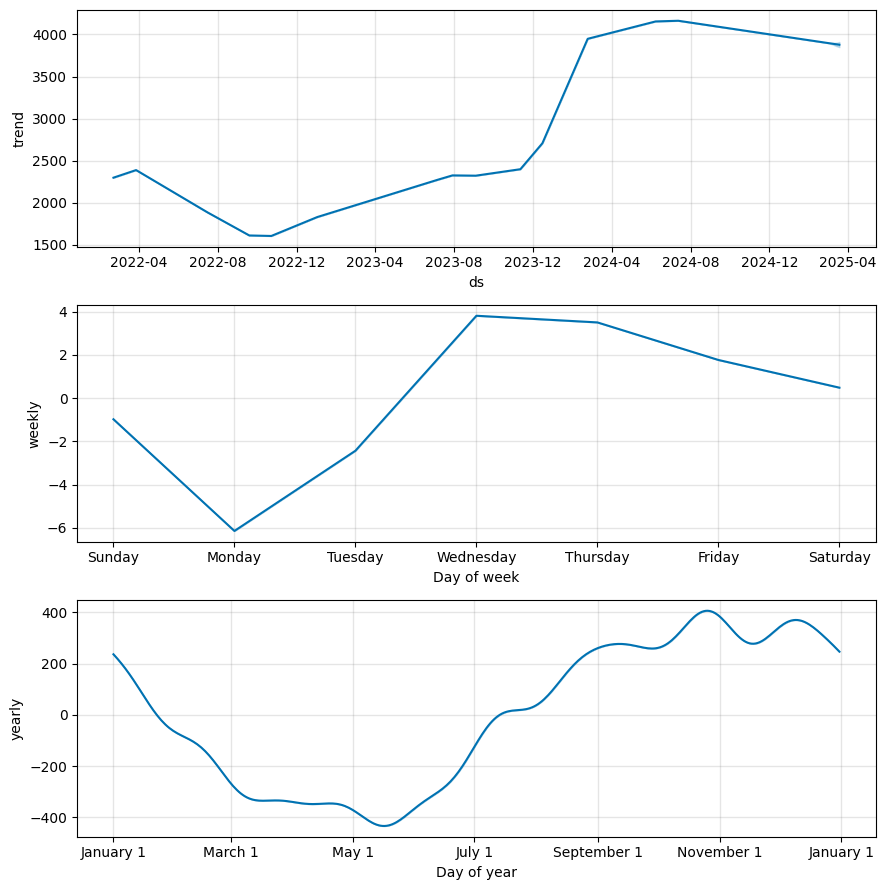

In [76]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_hdfc = h.reset_index()
prophet_data_hdfc.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

# Initialize the Prophet model
model_hdfc = Prophet()

# Fit the model on the historical data
model_hdfc.fit(prophet_data_hdfc)

# Forecast for the next 30 days
future_hdfc = model_hdfc.make_future_dataframe(periods=30)
forecast_hdfc = model_hdfc.predict(future_hdfc)

# Plot the forecast
fig_hdfc = model_hdfc.plot(forecast_hdfc)
plt.title('Prophet 30-Day Forecast for HDFC AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_hdfc = model_hdfc.plot_components(forecast_hdfc)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/ladi7mu3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/syhs8zhs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26987', 'data', 'file=/tmp/tmph1fkhob7/ladi7mu3.json', 'init=/tmp/tmph1fkhob7/syhs8zhs.json', 'output', 'file=/tmp/tmph1fkhob7/prophet_modelkbziucrd/prophet_model-20250218170542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


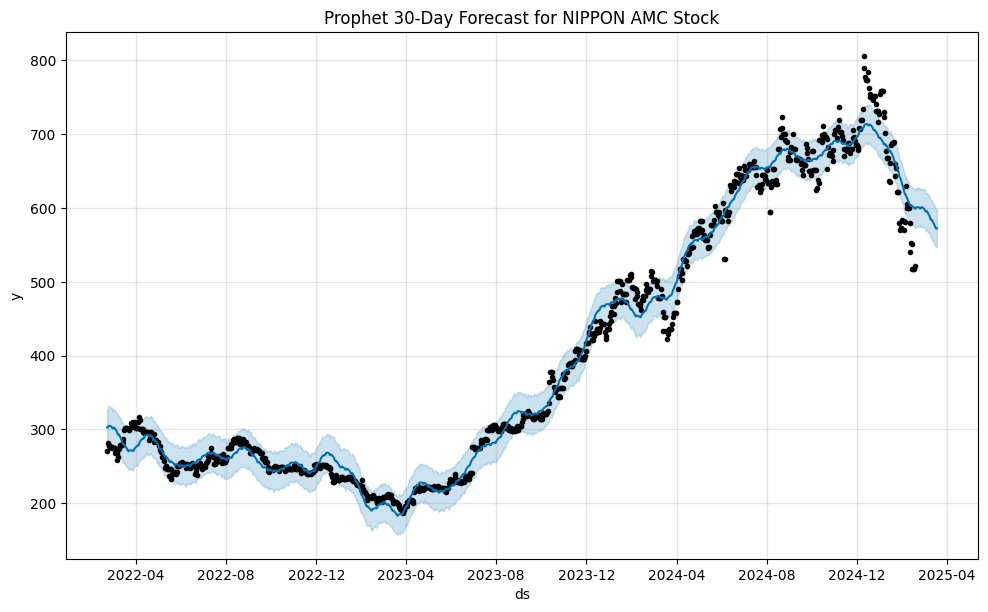

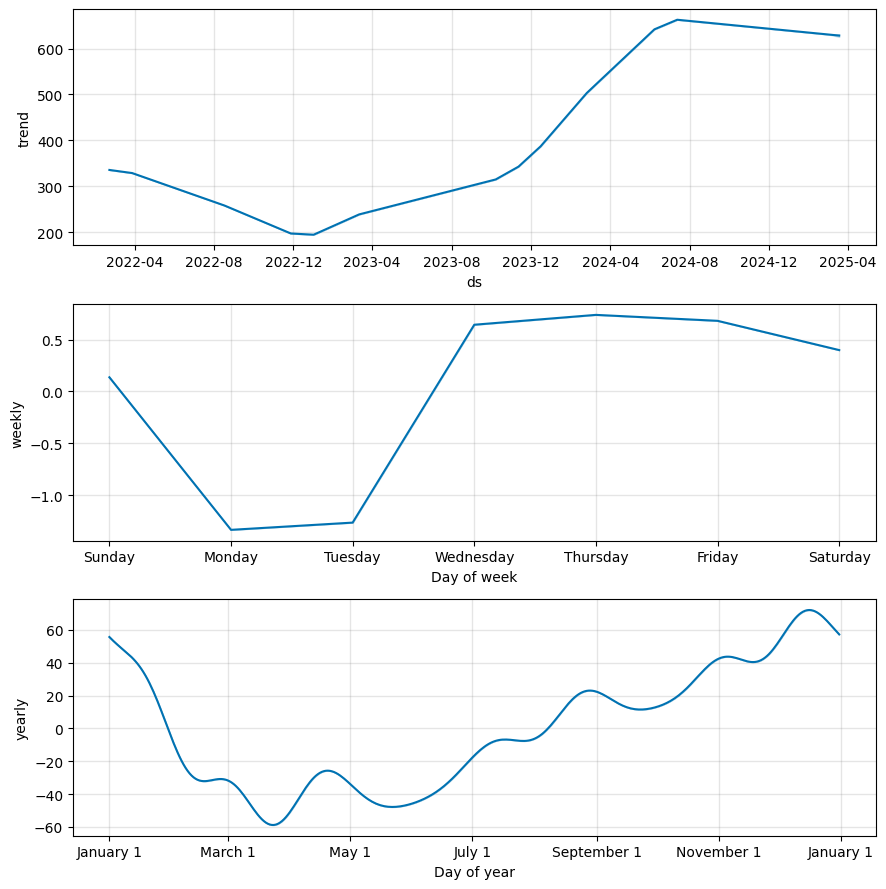

In [77]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_nippon = n.reset_index()
prophet_data_nippon.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

# Initialize the Prophet model
model_nippon = Prophet()

# Fit the model on the historical data
model_nippon.fit(prophet_data_nippon)

# Forecast for the next 30 days
future_nippon = model_nippon.make_future_dataframe(periods=30)
forecast_nippon = model_nippon.predict(future_nippon)

# Plot the forecast
fig_nippon = model_nippon.plot(forecast_nippon)
plt.title('Prophet 30-Day Forecast for NIPPON AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_nippon = model_nippon.plot_components(forecast_nippon)
plt.show()

**Tuned prophet models :**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/bjspd6xs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/vpywjuc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99475', 'data', 'file=/tmp/tmph1fkhob7/bjspd6xs.json', 'init=/tmp/tmph1fkhob7/vpywjuc4.json', 'output', 'file=/tmp/tmph1fkhob7/prophet_model19nigl5m/prophet_model-20250218170545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


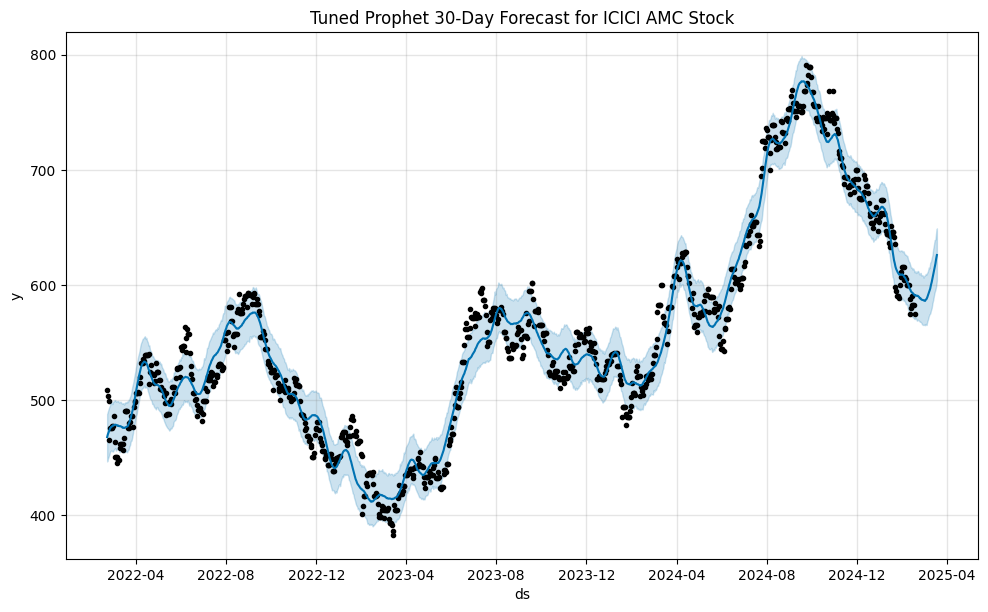

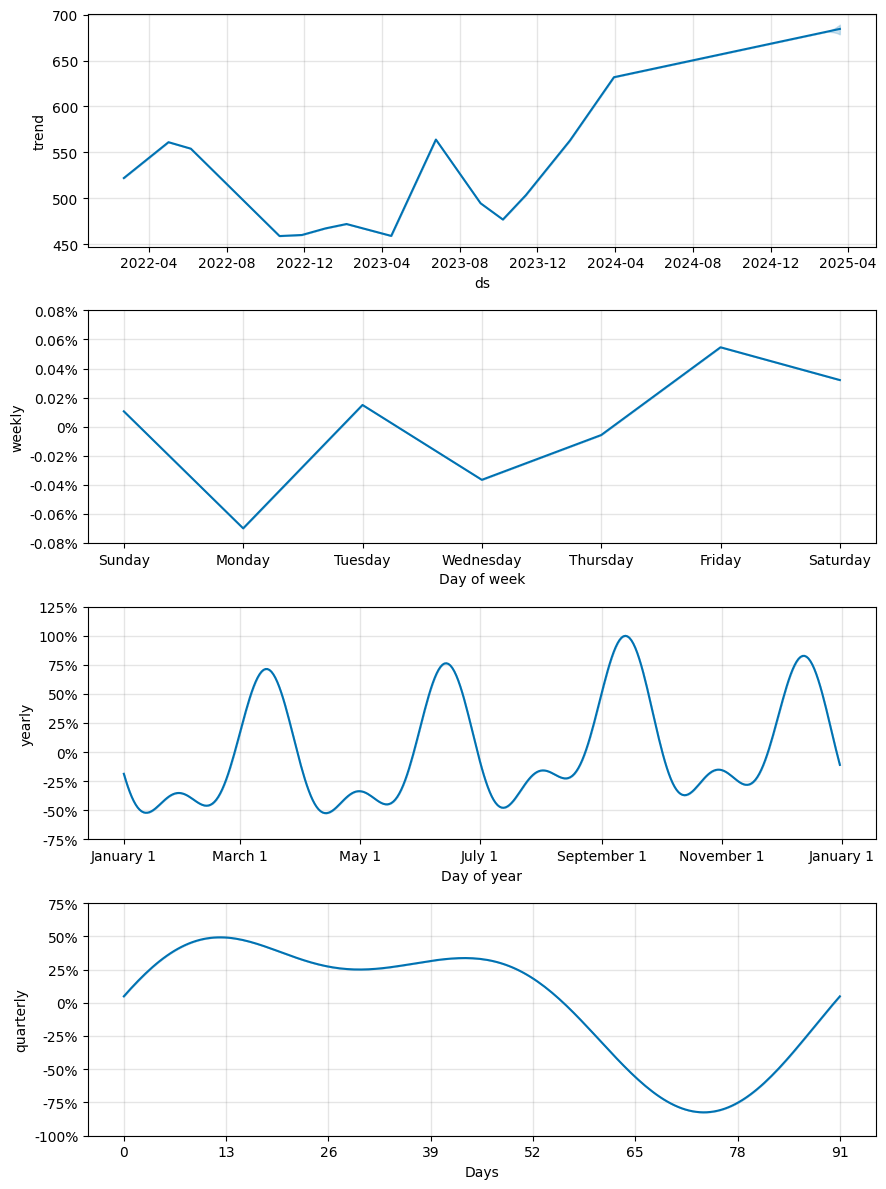

ds        yhat  yhat_lower  yhat_upper
1093 2025-02-18  591.269899  571.456271  612.058470
1094 2025-02-19  590.680384  570.471943  610.358979
1095 2025-02-20  590.629059  568.968845  611.372979
1096 2025-02-21  590.720586  569.906502  612.262856
1097 2025-02-22  590.167112  569.382485  611.851503
1098 2025-02-23  589.534312  568.914976  609.364990
1099 2025-02-24  588.425909  568.019686  609.229754
1100 2025-02-25  588.399050  568.088453  610.536439
1101 2025-02-26  587.442681  567.191260  608.202183
1102 2025-02-27  587.100569  565.793461  608.540412
1103 2025-02-28  587.073541  565.501983  608.236044
1104 2025-03-01  586.655549  565.203862  606.347982
1105 2025-03-02  586.474655  565.662946  608.127717
1106 2025-03-03  586.168729  565.082810  608.338106
1107 2025-03-04  587.302895  566.246285  609.680890
1108 2025-03-05  587.840093  565.290547  609.086182
1109 2025-03-06  589.278397  568.243168  610.691324
1110 2025-03-07  591.250745  570.177989  612.152227
1111 2025-03-08  592.970519  572.793233  615.277498
1112 2025-03-09  594.983245  574.560257  614.494871
1113 2025-03-10  596.846644  575.306479  619.261399
1114 2025-03-11  600.059428  578.025050  620.243421
1115 2025-03-12  602.528670  580.077400  623.278720
1116 2025-03-13  605.721091  584.259703  625.930066
1117 2025-03-14  609.255308  586.985860  631.156934
1118 2025-03-15  612.348086  590.669478  634.843823
1119 2025-03-16  615.565211  593.870268  639.010266
1120 2025-03-17  618.493073  595.796943  639.371669
1121 2025-03-18  622.666189  598.983428  645.595347
1122 2025-03-19  626.020325  604.031943  649.140545

In [78]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_icici = i.reset_index()
prophet_data_icici.columns = ['ds', 'y']

# Initialize the Prophet model with tuning parameters
model_icici = Prophet(
    growth='linear',              # or 'logistic' for saturation
    changepoint_prior_scale=0.05, # Higher values make the model more flexible in fitting
    seasonality_mode='multiplicative',  # Can be 'additive' or 'multiplicative'
    yearly_seasonality=True,      # Can be set to 'auto' or a specific number
    weekly_seasonality=True       # Weekly seasonality
)

# Add additional seasonality if needed (e.g., quarterly seasonality)
model_icici.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model
model_icici.fit(prophet_data_icici)

# Make future dataframe for the next 30 days
future_icici = model_icici.make_future_dataframe(periods=30)

# Forecast
forecast_icici = model_icici.predict(future_icici)

# Plot the forecast
fig_icici = model_icici.plot(forecast_icici)
plt.title('Tuned Prophet 30-Day Forecast for ICICI AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_icici = model_icici.plot_components(forecast_icici)
plt.show()

# Evaluate changepoints and seasonality components
forecast_icici[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/qearmfwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/al4tyz25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95153', 'data', 'file=/tmp/tmph1fkhob7/qearmfwk.json', 'init=/tmp/tmph1fkhob7/al4tyz25.json', 'output', 'file=/tmp/tmph1fkhob7/prophet_model81g_zvum/prophet_model-20250218170549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


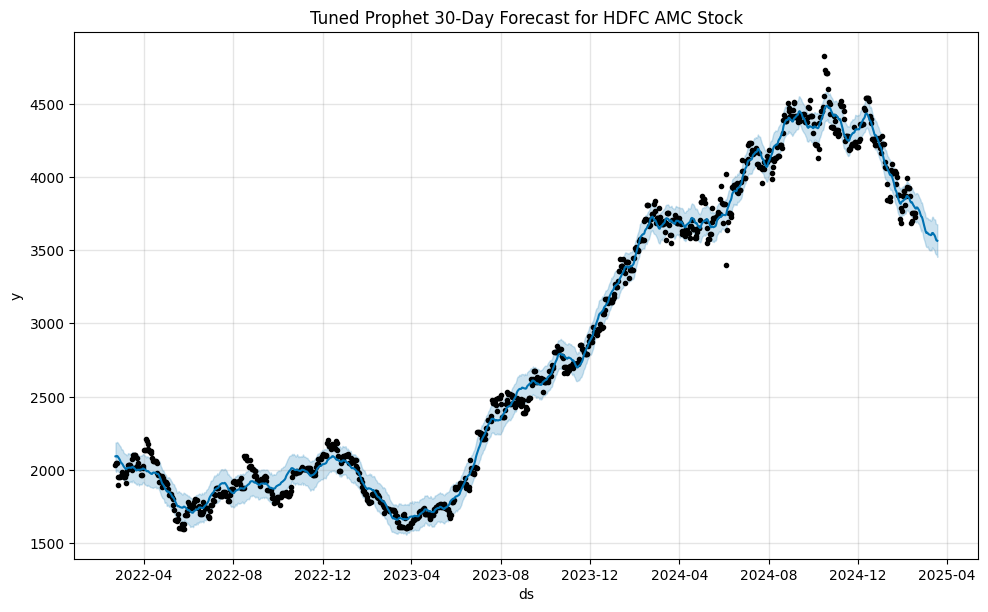

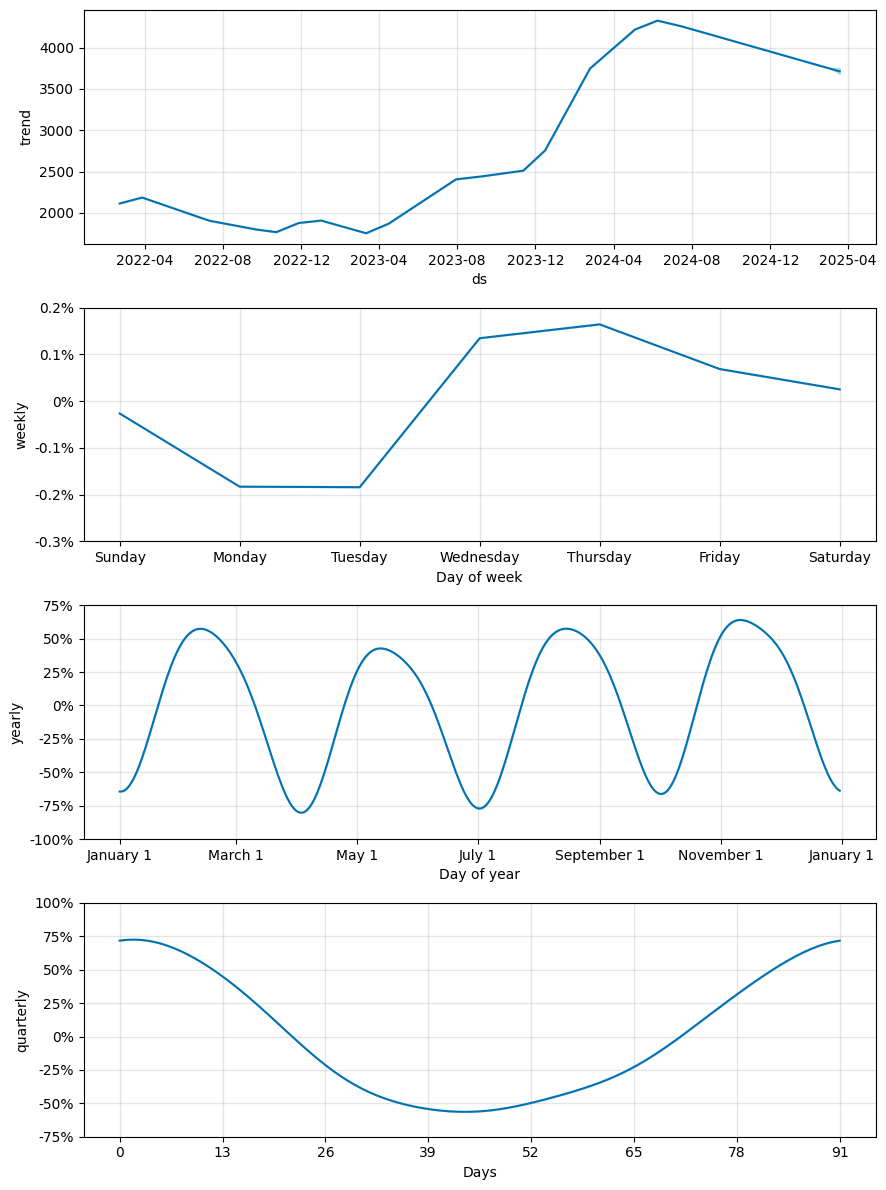

ds         yhat   yhat_lower   yhat_upper
1093 2025-02-18  3784.259025  3689.949701  3890.135072
1094 2025-02-19  3793.462730  3697.652080  3891.670843
1095 2025-02-20  3791.119952  3691.539339  3887.141714
1096 2025-02-21  3782.726818  3682.892539  3879.901365
1097 2025-02-22  3774.367892  3680.300989  3865.620295
1098 2025-02-23  3763.353154  3664.598835  3856.039338
1099 2025-02-24  3745.867160  3648.062125  3845.742621
1100 2025-02-25  3731.811998  3628.949885  3825.901877
1101 2025-02-26  3727.727160  3640.323612  3826.770532
1102 2025-02-27  3711.345062  3616.595222  3805.228784
1103 2025-02-28  3689.639487  3586.510617  3782.204795
1104 2025-03-01  3670.168463  3571.549348  3767.348646
1105 2025-03-02  3651.573470  3556.143936  3756.938396
1106 2025-03-03  3631.040051  3533.867885  3729.504248
1107 2025-03-04  3618.959922  3523.277366  3719.092895
1108 2025-03-05  3621.852844  3521.144509  3723.371474
1109 2025-03-06  3617.018205  3525.828647  3718.988925
1110 2025-03-07  3610.395559  3509.437876  3709.743749
1111 2025-03-08  3608.131338  3501.286607  3712.231248
1112 2025-03-09  3607.265305  3498.710733  3710.014302
1113 2025-03-10  3603.333519  3502.428903  3700.152260
1114 2025-03-11  3605.148132  3498.754040  3705.434044
1115 2025-03-12  3617.953057  3520.286324  3729.019842
1116 2025-03-13  3618.310264  3514.499121  3728.888678
1117 2025-03-14  3611.802339  3505.500759  3714.188899
1118 2025-03-15  3604.741459  3500.588400  3711.658190
1119 2025-03-16  3594.860124  3481.514077  3710.778923
1120 2025-03-17  3578.793950  3472.916166  3680.272336
1121 2025-03-18  3566.668015  3472.327890  3679.093971
1122 2025-03-19  3565.162882  3455.086901  3677.365654

In [79]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_hdfc = h.reset_index()
prophet_data_hdfc.columns = ['ds', 'y']

# Initialize the Prophet model with tuning parameters
model_hdfc = Prophet(
    growth='linear',              # or 'logistic' for saturation
    changepoint_prior_scale=0.05, # Higher values make the model more flexible in fitting
    seasonality_mode='multiplicative',  # Can be 'additive' or 'multiplicative'
    yearly_seasonality=True,      # Can be set to 'auto' or a specific number
    weekly_seasonality=True       # Weekly seasonality
)

# Add additional seasonality if needed (e.g., quarterly seasonality)
model_hdfc.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model
model_hdfc.fit(prophet_data_hdfc)

# Make future dataframe for the next 30 days
future_hdfc = model_hdfc.make_future_dataframe(periods=30)

# Forecast
forecast_hdfc = model_hdfc.predict(future_hdfc)

# Plot the forecast
fig_hdfc = model_hdfc.plot(forecast_hdfc)
plt.title('Tuned Prophet 30-Day Forecast for HDFC AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_hdfc = model_hdfc.plot_components(forecast_hdfc)
plt.show()

# Evaluate changepoints and seasonality components
forecast_hdfc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/vna7uuxq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/681u32c9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80089', 'data', 'file=/tmp/tmph1fkhob7/vna7uuxq.json', 'init=/tmp/tmph1fkhob7/681u32c9.json', 'output', 'file=/tmp/tmph1fkhob7/prophet_model8ef27dp3/prophet_model-20250218170555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


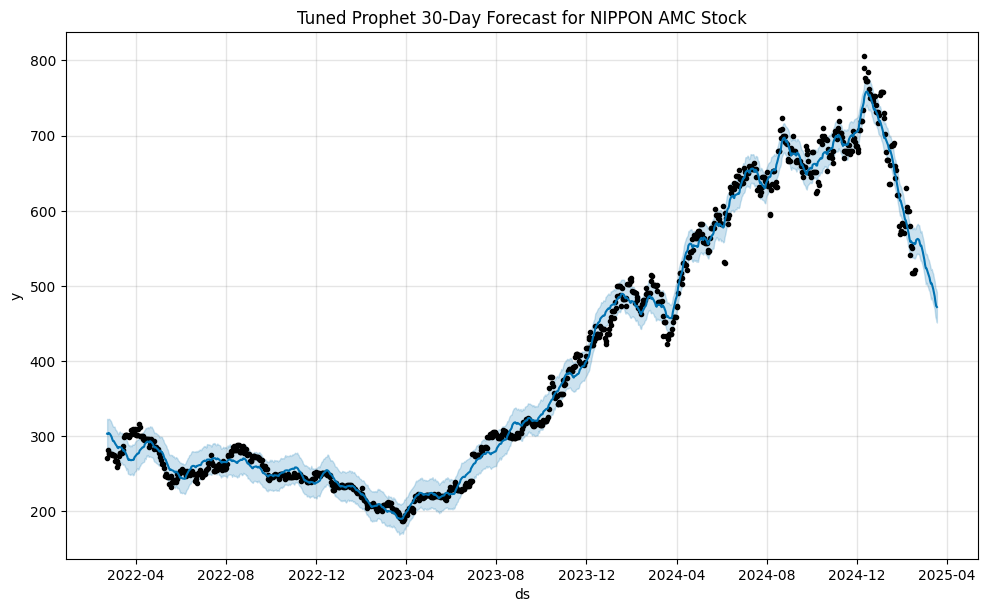

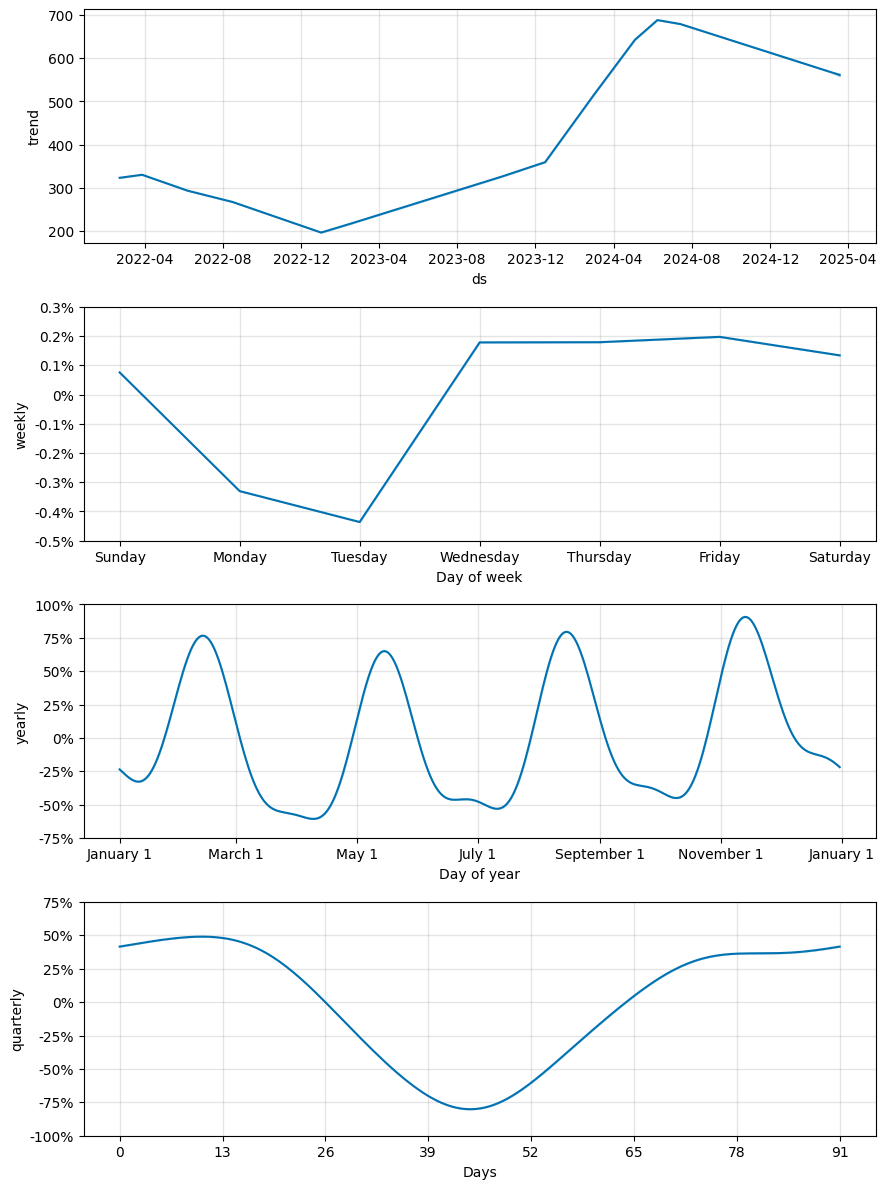

ds        yhat  yhat_lower  yhat_upper
1093 2025-02-18  556.153700  537.921926  575.759392
1094 2025-02-19  560.946975  541.236977  579.466219
1095 2025-02-20  561.952265  542.888492  581.203626
1096 2025-02-21  562.573264  542.382512  582.661761
1097 2025-02-22  562.053026  542.847499  580.993943
1098 2025-02-23  560.760586  541.568780  580.911861
1099 2025-02-24  556.620058  537.159195  575.388197
1100 2025-02-25  553.361467  533.612767  571.140896
1101 2025-02-26  553.470667  533.021363  573.109440
1102 2025-02-27  549.460897  529.568309  568.451752
1103 2025-02-28  545.133707  525.941502  564.474464
1104 2025-03-01  540.131314  521.091150  559.907001
1105 2025-03-02  535.152859  515.279719  552.906406
1106 2025-03-03  528.371684  508.536481  546.577150
1107 2025-03-04  523.616241  502.116197  542.109592
1108 2025-03-05  523.352024  504.090671  542.797028
1109 2025-03-06  520.009006  501.071563  540.285797
1110 2025-03-07  517.136756  498.508618  536.128718
1111 2025-03-08  514.075961  494.800863  534.626897
1112 2025-03-09  511.181128  492.897789  530.853390
1113 2025-03-10  506.299184  487.959081  526.519458
1114 2025-03-11  502.941862  482.084993  521.563892
1115 2025-03-12  503.342591  484.337985  522.662294
1116 2025-03-13  499.859670  480.450545  518.824728
1117 2025-03-14  496.020369  476.240227  516.192107
1118 2025-03-15  491.282147  472.831642  510.311272
1119 2025-03-16  486.211657  468.462275  506.504266
1120 2025-03-17  478.959636  458.592874  497.699622
1121 2025-03-18  473.352315  455.383537  495.600962
1122 2025-03-19  471.951594  451.299433  491.827044

In [80]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_nippon = n.reset_index()
prophet_data_nippon.columns = ['ds', 'y']

# Initialize the Prophet model with tuning parameters
model_nippon = Prophet(
    growth='linear',              # or 'logistic' for saturation
    changepoint_prior_scale=0.05, # Higher values make the model more flexible in fitting
    seasonality_mode='multiplicative',  # Can be 'additive' or 'multiplicative'
    yearly_seasonality=True,      # Can be set to 'auto' or a specific number
    weekly_seasonality=True       # Weekly seasonality
)

# Add additional seasonality if needed (e.g., quarterly seasonality)
model_nippon.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model
model_nippon.fit(prophet_data_nippon)

# Make future dataframe for the next 30 days
future_nippon = model_nippon.make_future_dataframe(periods=30)

# Forecast
forecast_nippon = model_nippon.predict(future_nippon)

# Plot the forecast
fig_nippon = model_nippon.plot(forecast_nippon)
plt.title('Tuned Prophet 30-Day Forecast for NIPPON AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_nippon = model_nippon.plot_components(forecast_nippon)
plt.show()

# Evaluate changepoints and seasonality components
forecast_nippon[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

**Hyperparameter tuning for the Prophet model using different combinations of changepoint prior scale, seasonality mode, and growth options.**

It identifies the best model based on the mean absolute error (MAE) for forecast accuracy.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/wrfcmvnn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/_g1bu3c8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52562', 'data', 'file=/tmp/tmph1fkhob7/wrfcmvnn.json', 'init=/tmp/tmph1fkhob7/_g1bu3c8.json', 'output', 'file=/tmp/tmph1fkhob7/prophet_modeln176lyfv/prophet_model-20250218170559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:06:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1

ICICI Best Params: Changepoint Prior Scale = 0.1, Seasonality Mode = additive, Growth = linear
ICICI Best MAE: 10.873937080407273


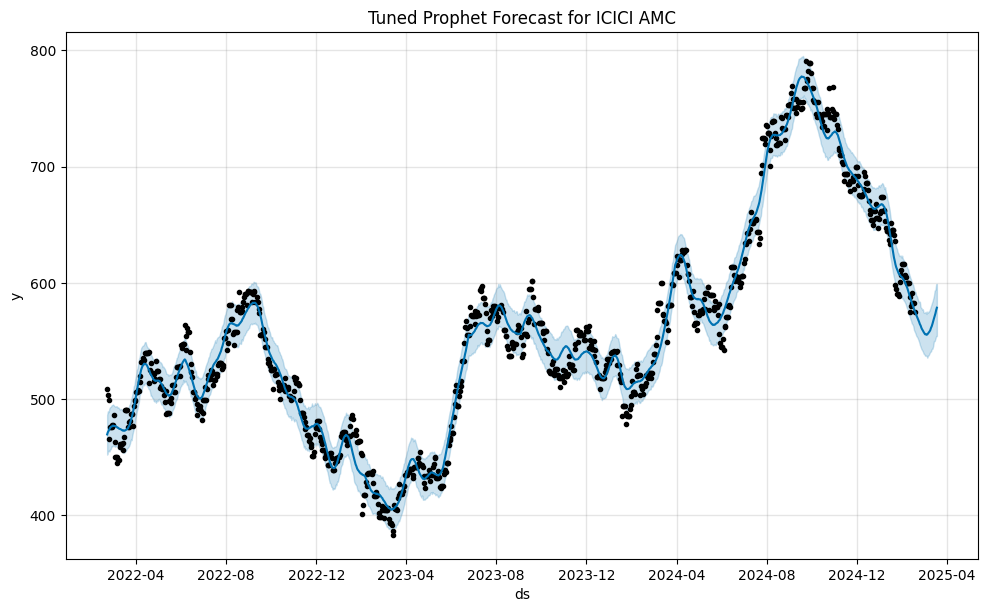

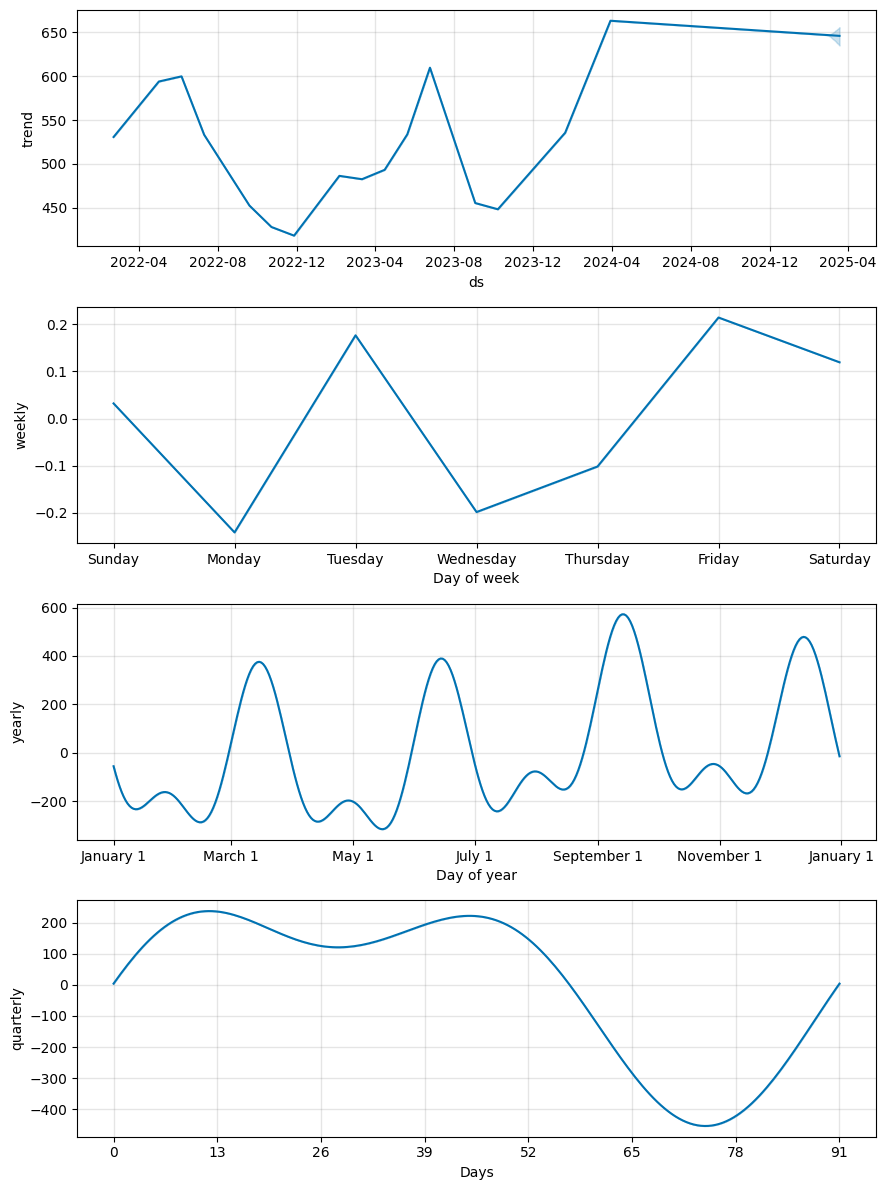

In [81]:
# ICICI AMC Stock Forecasting
# Prepare data for Prophet
prophet_data_icici = i.reset_index()
prophet_data_icici.columns = ['ds', 'y']

# Set a cap (upper limit) for logistic growth
prophet_data_icici['cap'] = 200

# Define parameter grids for tuning
changepoint_prior_scales = [0.001, 0.01, 0.05, 0.1]
seasonality_modes = ['additive', 'multiplicative']
growth_options = ['linear', 'logistic']

# Initialize variable to store the best model and its corresponding MAE
best_mae_icici = float('inf')
best_params_icici = None
best_model_icici = None

# Loop through different combinations of hyperparameters
for cps in changepoint_prior_scales:
    for sm in seasonality_modes:
        for growth in growth_options:
            # Initialize Prophet model with hyperparameters
            model_icici = Prophet(
                growth=growth,
                changepoint_prior_scale=cps,
                seasonality_mode=sm,
                yearly_seasonality=True,
                weekly_seasonality=True
            )

            # Add additional quarterly seasonality BEFORE fitting the model
            model_icici.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

            # Fit the model (with logistic cap if needed)
            if growth == 'logistic':
                model_icici.fit(prophet_data_icici[['ds', 'y', 'cap']])
            else:
                model_icici.fit(prophet_data_icici[['ds', 'y']])

            # Make future predictions
            future_icici = model_icici.make_future_dataframe(periods=30)
            if growth == 'logistic':
                future_icici['cap'] = 200

            forecast_icici = model_icici.predict(future_icici)

            # Evaluate model performance using MAE
            mae = mean_absolute_error(prophet_data_icici['y'], forecast_icici['yhat'][:len(prophet_data_icici)])

            # Track the best model based on MAE
            if mae < best_mae_icici:
                best_mae_icici = mae
                best_params_icici = (cps, sm, growth)
                best_model_icici = model_icici

# Output the best hyperparameters for ICICI
print(f"ICICI Best Params: Changepoint Prior Scale = {best_params_icici[0]}, Seasonality Mode = {best_params_icici[1]}, Growth = {best_params_icici[2]}")
print(f"ICICI Best MAE: {best_mae_icici}")

# Forecast using the best model for ICICI
future_icici = best_model_icici.make_future_dataframe(periods=30)
if best_params_icici[2] == 'logistic':
    future_icici['cap'] = 200
forecast_icici = best_model_icici.predict(future_icici)

# Plot the forecast for ICICI
fig_icici = best_model_icici.plot(forecast_icici)
plt.title('Tuned Prophet Forecast for ICICI AMC')
plt.show()

# Plot components for ICICI
fig2_icici = best_model_icici.plot_components(forecast_icici)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/gx0z_5oe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/b6kjniml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40613', 'data', 'file=/tmp/tmph1fkhob7/gx0z_5oe.json', 'init=/tmp/tmph1fkhob7/b6kjniml.json', 'output', 'file=/tmp/tmph1fkhob7/prophet_modely0hc5rw5/prophet_model-20250218170625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:06:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:06:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1

HDFC Best Params: Changepoint Prior Scale = 0.1, Seasonality Mode = multiplicative, Growth = linear
HDFC Best MAE: 52.240090411303214


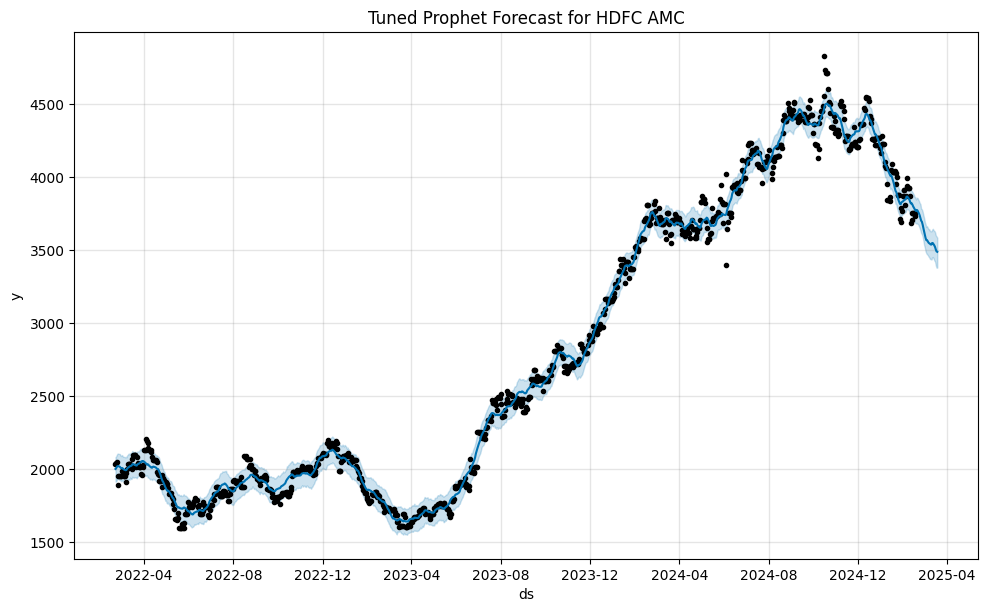

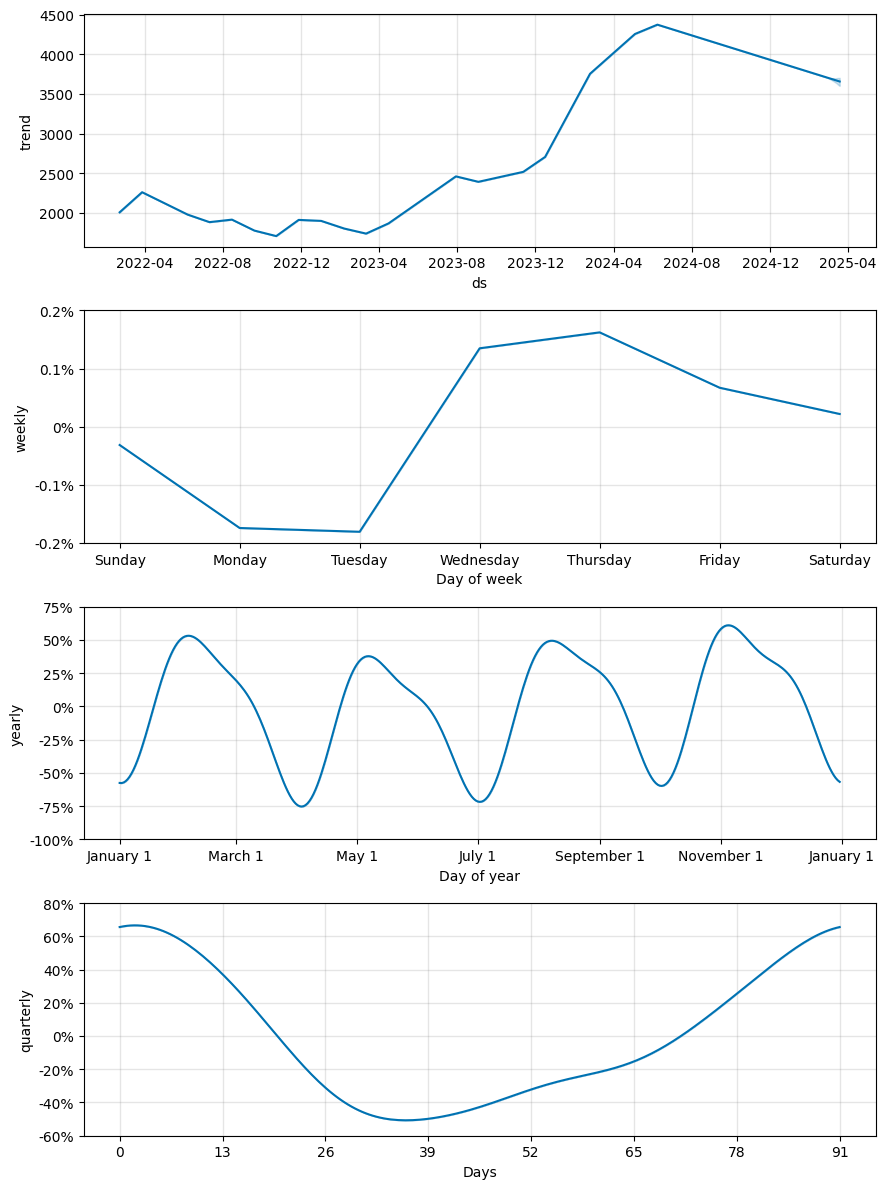

In [82]:
# HDFC AMC Stock Forecasting
# Prepare data for Prophet
prophet_data_hdfc = h.reset_index()
prophet_data_hdfc.columns = ['ds', 'y']

# Set a cap (upper limit) for logistic growth
prophet_data_hdfc['cap'] = 200

# Initialize variable to store the best model and its corresponding MAE
best_mae_hdfc = float('inf')
best_params_hdfc = None
best_model_hdfc = None

# Loop through different combinations of hyperparameters
for cps in changepoint_prior_scales:
    for sm in seasonality_modes:
        for growth in growth_options:
            # Initialize Prophet model with hyperparameters
            model_hdfc = Prophet(
                growth=growth,
                changepoint_prior_scale=cps,
                seasonality_mode=sm,
                yearly_seasonality=True,
                weekly_seasonality=True
            )

            # Add additional quarterly seasonality BEFORE fitting the model
            model_hdfc.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

            # Fit the model (with logistic cap if needed)
            if growth == 'logistic':
                model_hdfc.fit(prophet_data_hdfc[['ds', 'y', 'cap']])
            else:
                model_hdfc.fit(prophet_data_hdfc[['ds', 'y']])

            # Make future predictions
            future_hdfc = model_hdfc.make_future_dataframe(periods=30)
            if growth == 'logistic':
                future_hdfc['cap'] = 200

            forecast_hdfc = model_hdfc.predict(future_hdfc)

            # Evaluate model performance using MAE
            mae = mean_absolute_error(prophet_data_hdfc['y'], forecast_hdfc['yhat'][:len(prophet_data_hdfc)])

            # Track the best model based on MAE
            if mae < best_mae_hdfc:
                best_mae_hdfc = mae
                best_params_hdfc = (cps, sm, growth)
                best_model_hdfc = model_hdfc

# Output the best hyperparameters for HDFC
print(f"HDFC Best Params: Changepoint Prior Scale = {best_params_hdfc[0]}, Seasonality Mode = {best_params_hdfc[1]}, Growth = {best_params_hdfc[2]}")
print(f"HDFC Best MAE: {best_mae_hdfc}")

# Forecast using the best model for HDFC
future_hdfc = best_model_hdfc.make_future_dataframe(periods=30)
if best_params_hdfc[2] == 'logistic':
    future_hdfc['cap'] = 200
forecast_hdfc = best_model_hdfc.predict(future_hdfc)

# Plot the forecast for HDFC
fig_hdfc = best_model_hdfc.plot(forecast_hdfc)
plt.title('Tuned Prophet Forecast for HDFC AMC')
plt.show()

# Plot components for HDFC
fig2_hdfc = best_model_hdfc.plot_components(forecast_hdfc)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/j_42ac10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1fkhob7/rpm8_9_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91563', 'data', 'file=/tmp/tmph1fkhob7/j_42ac10.json', 'init=/tmp/tmph1fkhob7/rpm8_9_b.json', 'output', 'file=/tmp/tmph1fkhob7/prophet_modelfuj6yl5i/prophet_model-20250218170643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:06:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:06:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph1

NIPPON Best Params: Changepoint Prior Scale = 0.1, Seasonality Mode = multiplicative, Growth = linear
NIPPON Best MAE: 9.737991803573287


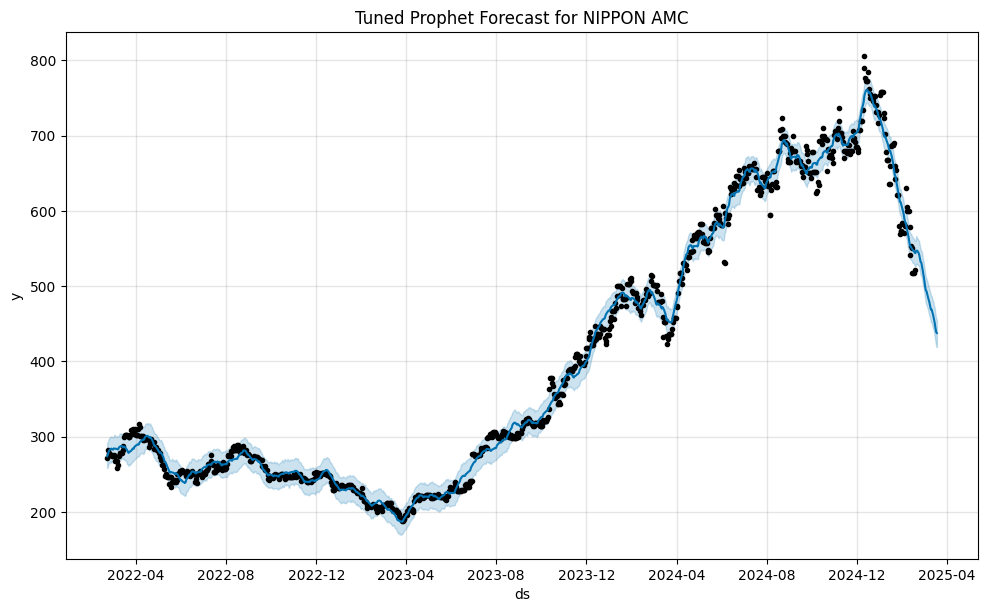

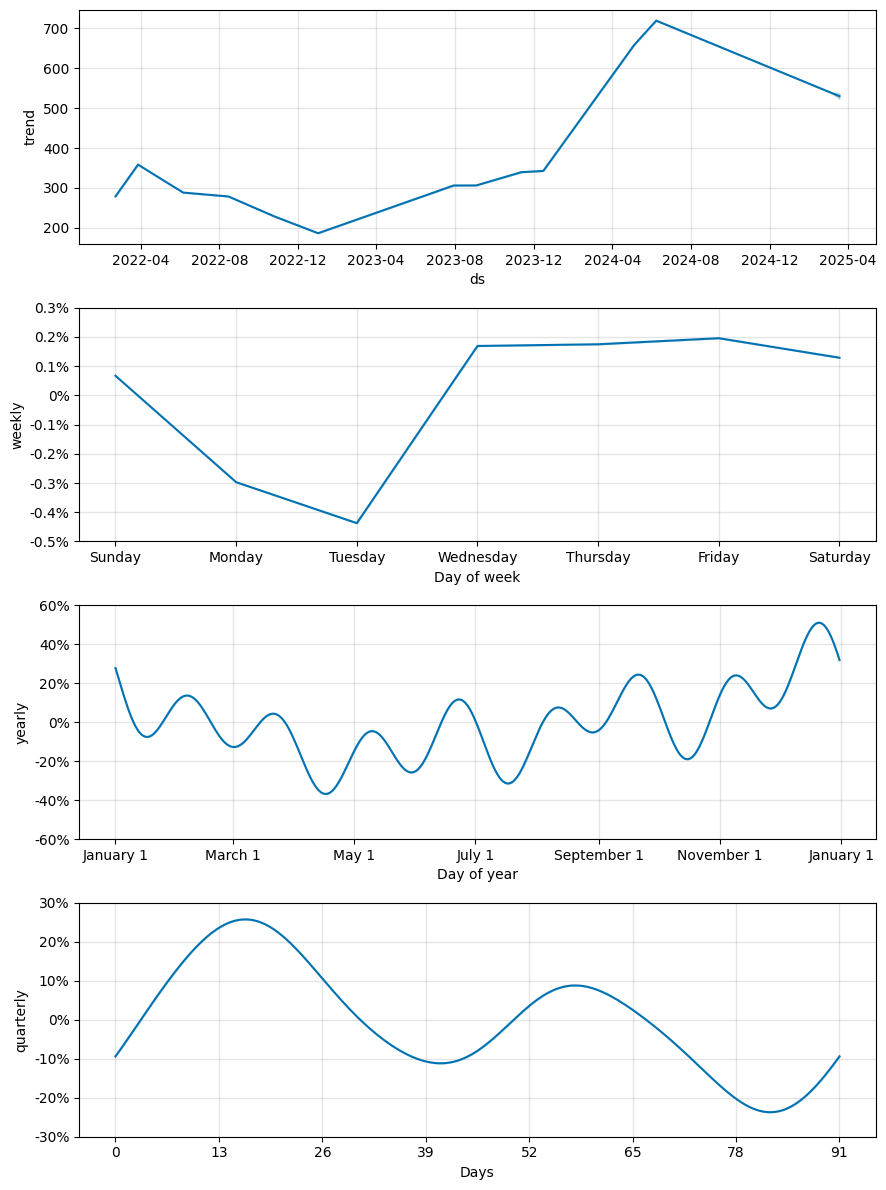

In [83]:
# NIPPON AMC Stock Forecasting
# Prepare data for Prophet
prophet_data_nippon = n.reset_index()
prophet_data_nippon.columns = ['ds', 'y']

# Set a cap (upper limit) for logistic growth
prophet_data_nippon['cap'] = 200

# Initialize variable to store the best model and its corresponding MAE
best_mae_nippon = float('inf')
best_params_nippon = None
best_model_nippon = None

# Loop through different combinations of hyperparameters
for cps in changepoint_prior_scales:
    for sm in seasonality_modes:
        for growth in growth_options:
            # Initialize Prophet model with hyperparameters
            model_nippon = Prophet(
                growth=growth,
                changepoint_prior_scale=cps,
                seasonality_mode=sm,
                yearly_seasonality=True,
                weekly_seasonality=True
            )

            # Add additional quarterly seasonality BEFORE fitting the model
            model_nippon.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

            # Fit the model (with logistic cap if needed)
            if growth == 'logistic':
                model_nippon.fit(prophet_data_nippon[['ds', 'y', 'cap']])
            else:
                model_nippon.fit(prophet_data_nippon[['ds', 'y']])

            # Make future predictions
            future_nippon = model_nippon.make_future_dataframe(periods=30)
            if growth == 'logistic':
                future_nippon['cap'] = 200

            forecast_nippon = model_nippon.predict(future_nippon)

            # Evaluate model performance using MAE
            mae = mean_absolute_error(prophet_data_nippon['y'], forecast_nippon['yhat'][:len(prophet_data_nippon)])

            # Track the best model based on MAE
            if mae < best_mae_nippon:
                best_mae_nippon = mae
                best_params_nippon = (cps, sm, growth)
                best_model_nippon = model_nippon

# Output the best hyperparameters for NIPPON
print(f"NIPPON Best Params: Changepoint Prior Scale = {best_params_nippon[0]}, Seasonality Mode = {best_params_nippon[1]}, Growth = {best_params_nippon[2]}")
print(f"NIPPON Best MAE: {best_mae_nippon}")

# Forecast using the best model for NIPPON
future_nippon = best_model_nippon.make_future_dataframe(periods=30)
if best_params_nippon[2] == 'logistic':
    future_nippon['cap'] = 200
forecast_nippon = best_model_nippon.predict(future_nippon)

# Plot the forecast for NIPPON
fig_nippon = best_model_nippon.plot(forecast_nippon)
plt.title('Tuned Prophet Forecast for NIPPON AMC')
plt.show()

# Plot components for NIPPON
fig2_nippon = best_model_nippon.plot_components(forecast_nippon)
plt.show()